In [1]:
import os
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pd.reset_option("all")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
os.chdir("/content/drive/MyDrive/Employment/MVP")
os.getcwd()

'/content/drive/MyDrive/Employment/MVP'

In [ ]:
%run load_data.ipynb

In [ ]:
import types

# List all functions defined in the current environment
functions_in_load_data = [func for func in dir() if isinstance(eval(func), types.FunctionType)]
print(functions_in_load_data)

['df_by_pitch_count', 'df_to_csv', 'find_primary_pitch', 'format_re24', 'format_re288', 'format_statcast', 'format_statcast2', 'get_diff_from_pitch_type', 'get_diff_from_primary_pitch', 'get_release_angle', 'get_statcast_by_season', 'id_to_name', 'player_search_list', 'playerid_lookup', 'playerid_reverse_lookup', 'plot_hexbin', 'plot_hexbin_pitch_bucket', 'plot_pitch_distribution', 're288_by_100scale', 'statcast', 'stuff_by_pitch_type']


## Run below code only if you need to scrape from scratch

In [ ]:
# raw2020 = get_statcast_by_season(2020)
# df_to_csv(raw2020, "/content/drive/MyDrive/Employment/MVP/Data", "raw2020.csv")

This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|██████████| 71/71 [01:02<00:00,  1.13it/s]
/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


DataFrame saved to /content/drive/MyDrive/Employment/MVP/Data/raw2020.csv


'/content/drive/MyDrive/Employment/MVP/Data/raw2020.csv'

## Read scraped statcast data

In [ ]:
raw2020 = pd.read_csv("./Data/raw2020.csv")
raw2021 = pd.read_csv("./Data/raw2021.csv")
raw2022 = pd.read_csv("./Data/raw2022.csv")
raw20_22 = pd.concat([raw2020, raw2021, raw2022])

raw2023 = pd.read_csv("./Data/raw2023.csv")

In [ ]:
df2023 = copy.deepcopy(raw2023)
df20_22 = copy.deepcopy(raw20_22)

In [ ]:
stat20_22 = format_statcast(df20_22)
stat20_22 = format_statcast2(stat20_22)
stat20_22 = format_re24(stat20_22)
stat20_22 = format_re288(stat20_22)
# stat20_22 = re288_by_100scale(stat20_22)
stat20_22 = get_release_angle(stat20_22)

stat2023 = format_statcast(df2023)
stat2023 = format_statcast2(stat2023)
stat2023 = format_re24(stat2023)
stat2023 = format_re288(stat2023)
# stat2023 = re288_by_100scale(stat2023)
stat2023 = get_release_angle(stat2023)

<ipython-input-4-d61dd9683a69>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pitch_type'].fillna('UN', inplace=True)


Gathering player lookup table. This may take a moment.


<ipython-input-4-d61dd9683a69>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pitch_type'].fillna('UN', inplace=True)


In [ ]:
# stat20_22 = get_diff_from_primary_pitch(stat20_22)
# stat2023 = get_diff_from_primary_pitch(stat2023)

In [ ]:
# df2022 = copy.deepcopy(raw2022)
# stat2022 = format_statcast(df2022)
# stat2022 = format_statcast2(stat2022)
# stat2022 = format_re24(stat2022)
# stat2022 = format_re288(stat2022)

<ipython-input-4-d9a0cf4e98d1>:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pitch_type'].fillna('UN', inplace=True)


### Simple Plotting of Pitch Distribution by pitcherid

In [ ]:
playerid_lookup('nola','aaron')
playerid_lookup('chapman','aroldis')

name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0   chapman    aroldis     547973  chapa001  chapmar01          10233   

   mlb_played_first  mlb_played_last  
0            2010.0           2024.0

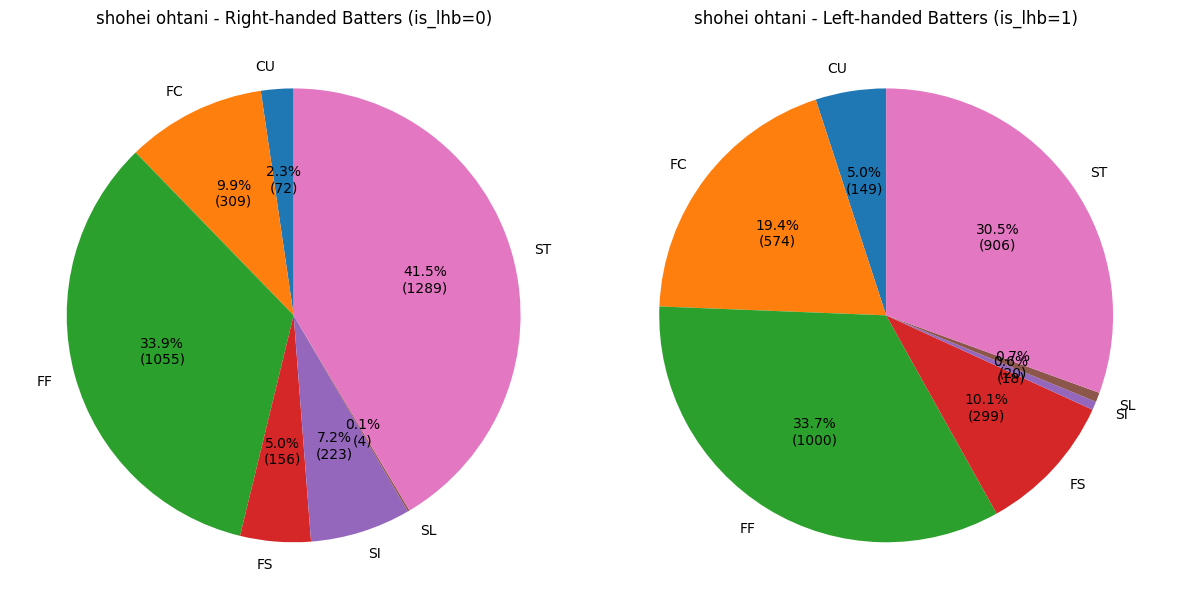

In [ ]:
# plot_pitch_distribution(stat20_22, 660271)
plot_pitch_distribution(stat2023, 660271)

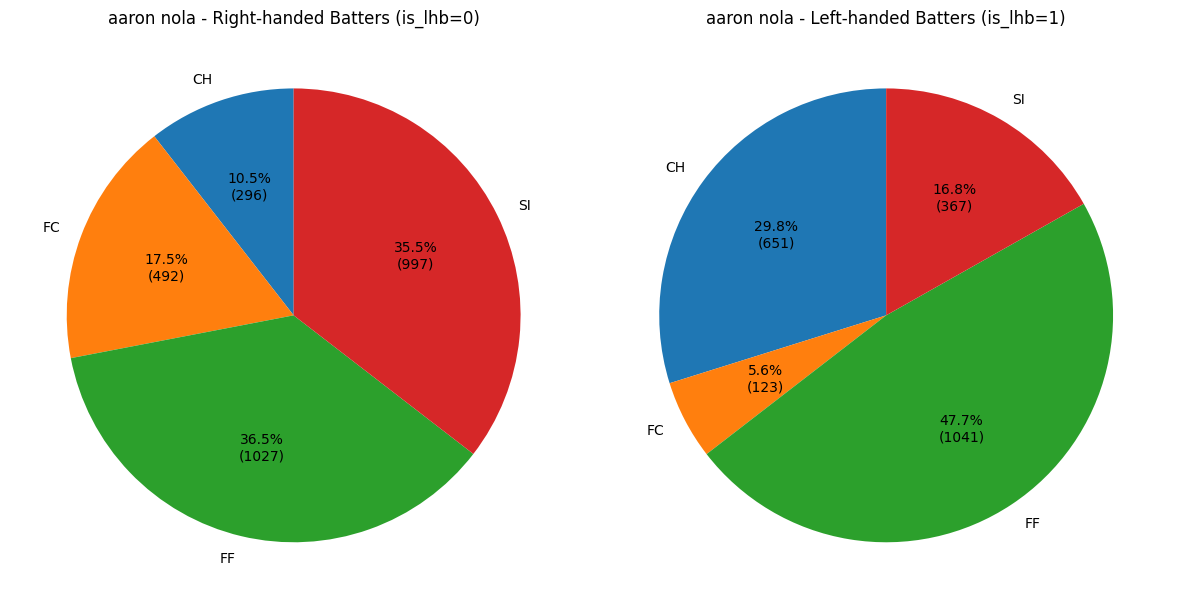

In [ ]:
plot_pitch_distribution(stat2023, 605400)

## Plotting Hexbin based on pitch type, pitch bucket, playerid (by total pitch count)

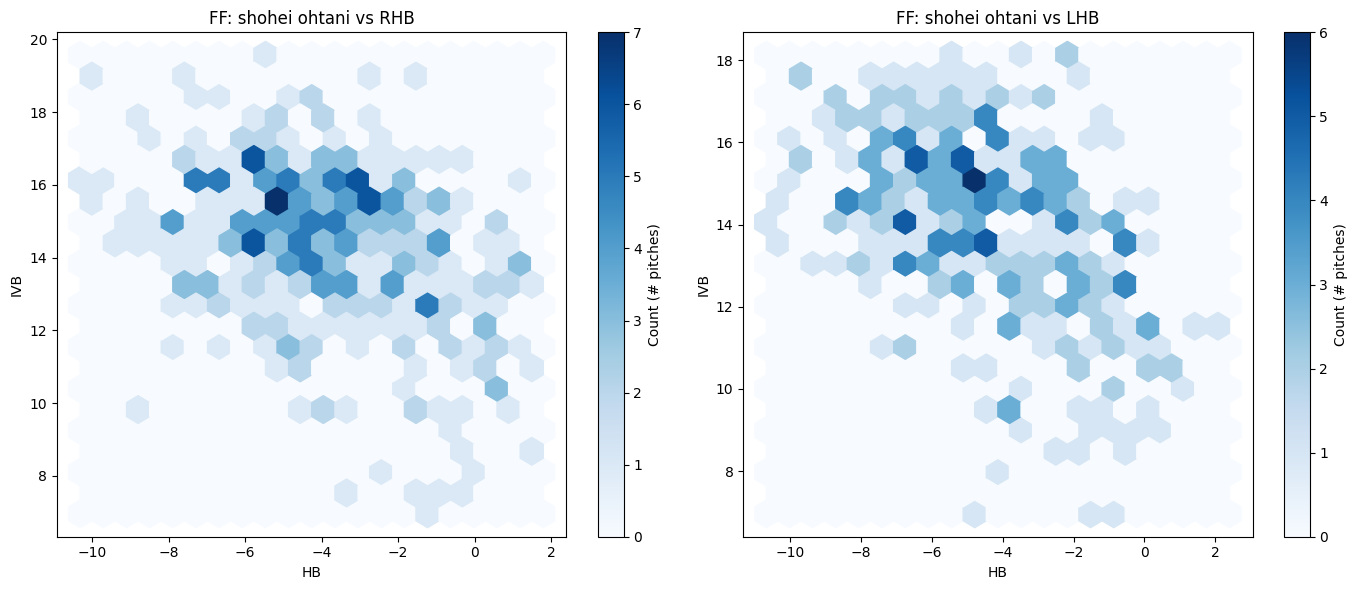

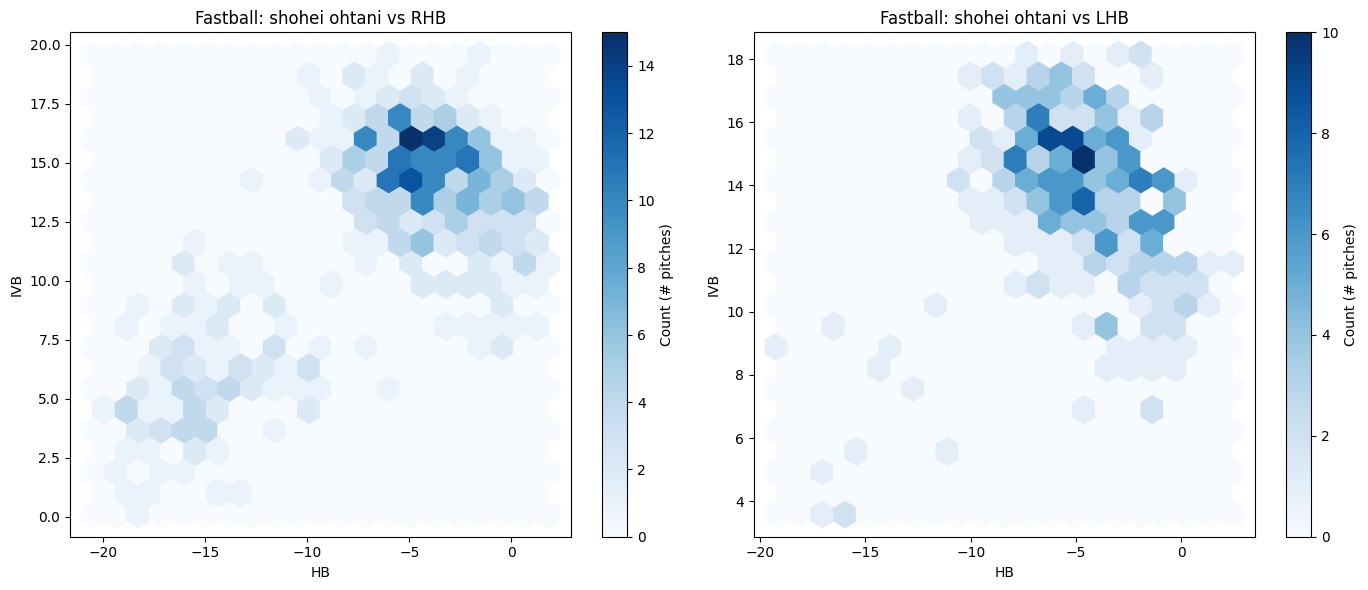

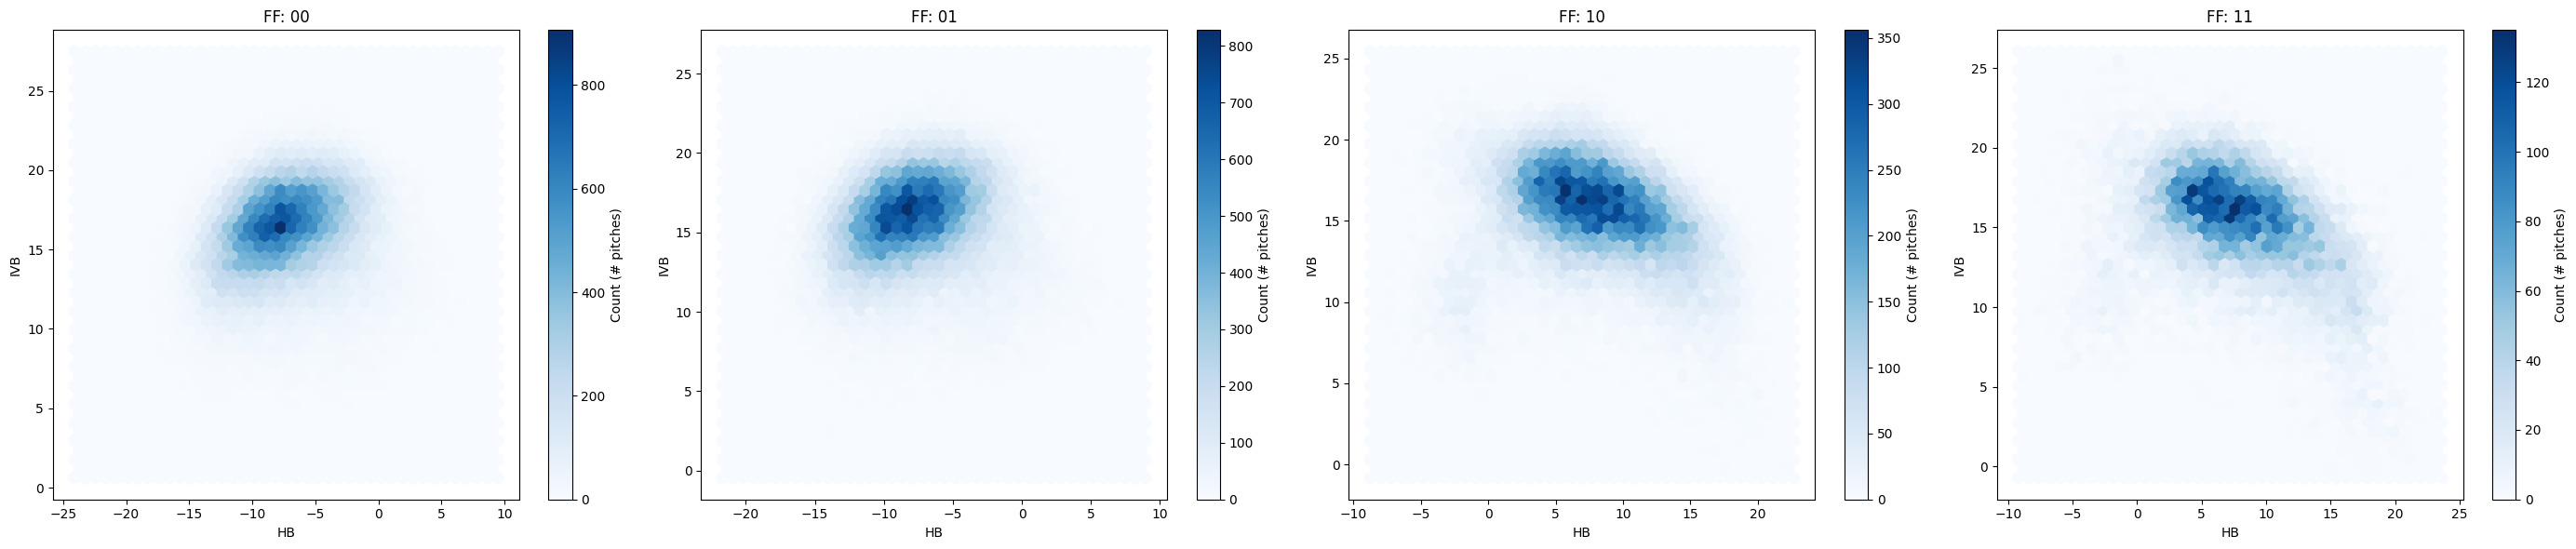

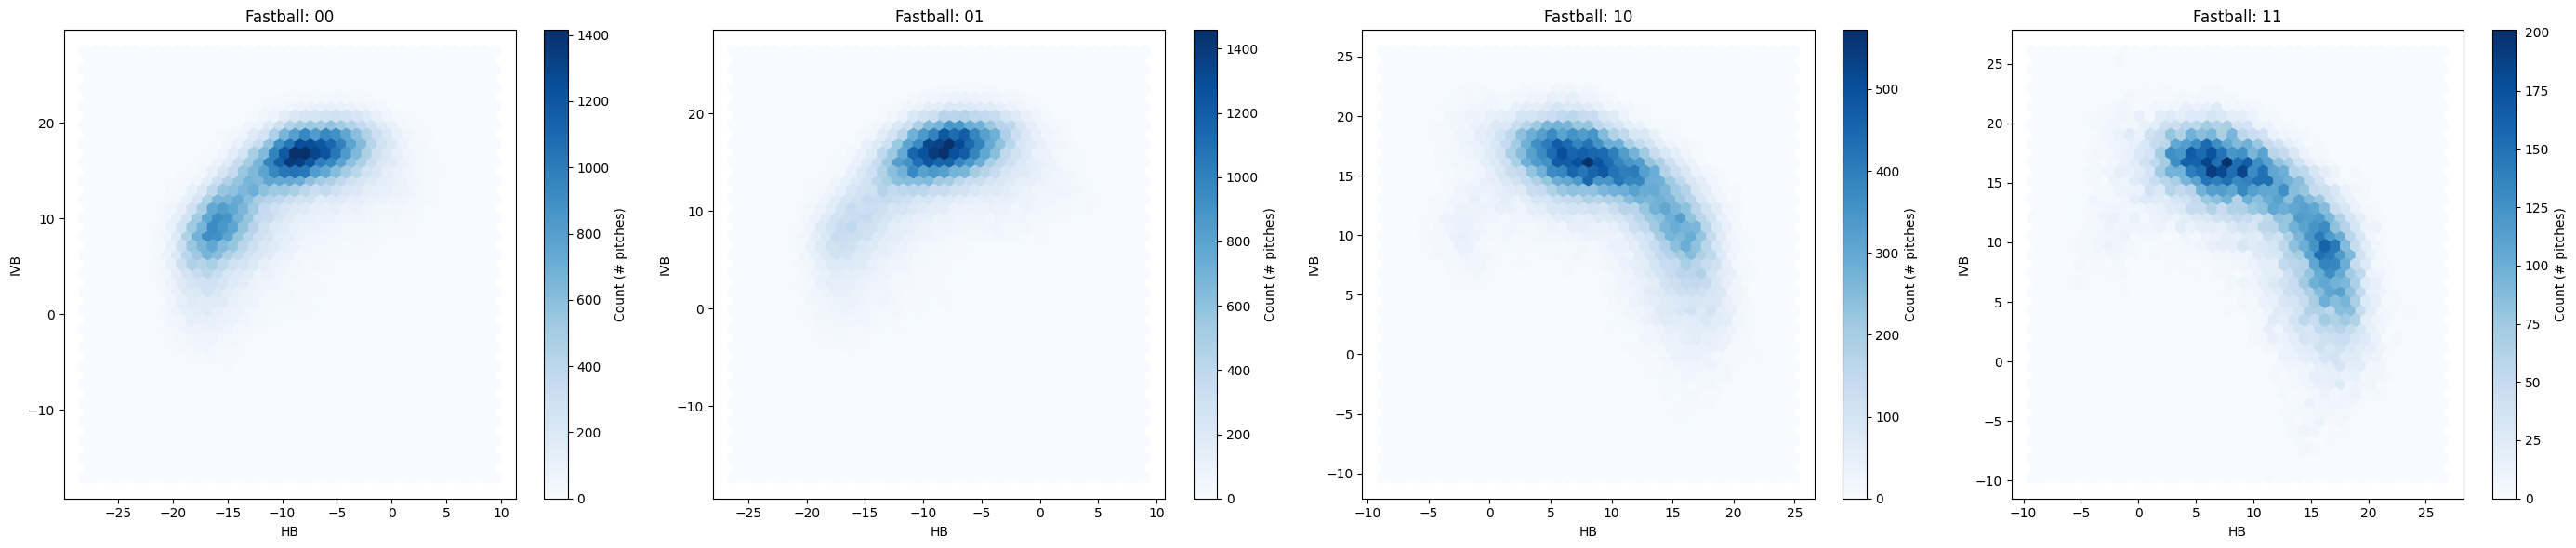

In [ ]:
# Player & Pitch_type
plot_hexbin(stat2023, x_axis='HB', y_axis='IVB', pitch_type='FF', player_id = 660271, gridsize=20)

# Player & Pitch_bucket
plot_hexbin(stat2023, x_axis='HB', y_axis='IVB', pitch_bucket='Fastball', player_id = 660271, gridsize=20)

# Pitch_type across the entire league
plot_hexbin(stat2023, x_axis='HB', y_axis='IVB', pitch_type='FF', gridsize=40)

# Pitch_bucket across the entire league
plot_hexbin(stat2023, x_axis='HB', y_axis='IVB', pitch_bucket='Fastball', gridsize=40)


In [ ]:
copy20_22 = copy.deepcopy(stat20_22)
copy2023 = copy.deepcopy(stat2023)

In [ ]:
copy20_22 = get_diff_from_primary_pitch(copy20_22)
copy2023 = get_diff_from_primary_pitch(copy2023)

In [ ]:
# copy20_22.loc[copy20_22['pitcherid'] == 547973][['pitcher_name','pitcherid','pitcher_lhb_key','pitch_type', 'primary_pitch','is_lhb','release_speed',
#                                                'release_speed_avg', 'diff_velo','HB', 'HB_avg','diff_HB','IVB', 'IVB_avg','diff_IVB']][:20]

In [ ]:
features = ['release_speed', 'release_spin', 'release_extension', 'IVB', 'HB', 'release_pos_x', 'release_pos_y', 'release_pos_z']
features_with_dif = ['release_speed', 'release_spin', 'release_extension', 'IVB', 'HB', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'diff_velo', 'diff_IVB', 'diff_HB']

fastballs = ['FF', 'SI']
breaking = ['ST', 'CU', 'FC', 'SL']
offspeed = ['CH', 'FS']

In [ ]:
# Expand hit_into_play by what its exact event type is (for instance single, double, triple, walk, etc.)
copy20_22['pitch_description'] = np.where(copy20_22['pitch_description'] == 'hit_into_play', copy20_22['event_type'], copy20_22['pitch_description'])
field_outs = ['force_out', 'grounded_into_double_play', 'fielders_choice_out', 'fielders_choice', 'field_out', 'double_play', 'sac_fly', 'sac_bunt', 'field_error', 'sac_fly_double_play', 'triple_play']
copy20_22['pitch_description'] = copy20_22['pitch_description'].replace(field_outs, 'field_out')

In [ ]:
copy20_22['whiff'] = copy20_22['pitch_description'].isin(['swinging_strike', 'swinging_strike_blocked'])
copy20_22['foul'] = copy20_22['pitch_description'].isin(['foul', 'foul_tip', 'foul_bun', 'bunt_foul_tip', 'missed_bunt'])
copy20_22['in_play'] = copy20_22['pitch_description'].isin(['single', 'double', 'triple', 'home_run', 'field_out'])
copy20_22['swing'] = (copy20_22['whiff'] | copy20_22['foul'] | copy20_22['in_play'])

copy20_22['take'] = (~copy20_22['swing'] & (copy20_22['pitch_description'].isin(['hit_by_pitch', 'ball', 'called_strike', 'blocked_ball'])))
copy20_22['hbp'] = copy20_22['pitch_description'] == 'hit_by_pitch'
copy20_22['ball'] = copy20_22['pitch_description'].isin(['blocked_ball', 'ball', 'walk'])
copy20_22['strike'] = (copy20_22['foul'] | copy20_22['pitch_description'].isin(['called_strike', 'strikeout']))

copy20_22['single'] = copy20_22['pitch_description'] == 'single'
copy20_22['double'] = copy20_22['pitch_description'] == 'double'
copy20_22['triple'] = copy20_22['pitch_description'] == 'triple'
copy20_22['home_run'] = copy20_22['pitch_description'] == 'home_run'
copy20_22['field_out'] = copy20_22['pitch_description'] == 'field_out'

## Swing, take, in_play columns for later model training

In [ ]:
copy20_22.loc[copy20_22['swing'] & copy20_22['foul'], 'type_swing'] = 'foul'
copy20_22.loc[copy20_22['swing'] & copy20_22['in_play'], 'type_swing'] = 'in_play'
copy20_22.loc[copy20_22['swing'] & copy20_22['whiff'], 'type_swing'] = 'whiff'

copy20_22.loc[copy20_22['take'] & copy20_22['hbp'], 'type_take'] = 'hbp'
copy20_22.loc[copy20_22['take'] & copy20_22['ball'], 'type_take'] = 'ball'
copy20_22.loc[copy20_22['take'] & copy20_22['strike'], 'type_take'] = 'strike'

copy20_22.loc[copy20_22['in_play'] & copy20_22['single'], 'type_in_play'] = 'single'
copy20_22.loc[copy20_22['in_play'] & copy20_22['double'], 'type_in_play'] = 'double'
copy20_22.loc[copy20_22['in_play'] & copy20_22['triple'], 'type_in_play'] = 'triple'
copy20_22.loc[copy20_22['in_play'] & copy20_22['home_run'], 'type_in_play'] = 'home_run'
copy20_22.loc[copy20_22['in_play'] & copy20_22['field_out'], 'type_in_play'] = 'field_out'

In [ ]:
# copy20_22 = copy20_22.dropna(subset=['swing', 'take'])
# copy20_22 = copy20_22[copy20_22['swing'] != copy20_22['take']]

In [ ]:
!pip install catboost
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import joblib
import math
import scipy.stats as stats
from catboost import Pool
import optuna
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, precision_score

# cache.enable()
from sklearn.preprocessing import LabelEncoder
from hyperopt import hp, fmin, tpe

## Swing model on based on pitch bucket (fast, breaking, offspeed)

In [ ]:
def objective(space, X_train, X_test, y_train, y_test):
    model = XGBClassifier(
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        colsample_bytree=space['colsample_bytree'],
        min_child_weight=int(space['min_child_weight']),
        n_estimators=int(space['n_estimators']))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy

le_swing = LabelEncoder()

swing_df = copy20_22[(copy20_22['swing']) & copy20_22['pitch_type'].isin(fastballs)]
swing_X = swing_df[features]
swing_y = le_swing.fit_transform(swing_df['type_swing'])

X_train, X_test, y_train, y_test = train_test_split(swing_X, swing_y, test_size=0.2, random_state=np.random.seed())

space = {
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'seed': 12
}

best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print("Best parameters:", best_params)

swing_model = XGBClassifier(**best_params)
swing_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:49<00:00,  4.94s/trial, best loss: -0.471242671600185]
Best parameters: {'max_depth': 15, 'gamma': 4.8023419388069675, 'reg_alpha': 90, 'reg_lambda': 0.0954032586778032, 'colsample_bytree': 0.6582030586526896, 'min_child_weight': 6, 'n_estimators': 188}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6582030586526896, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.8023419388069675,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=188, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
swing_df = copy20_22[(copy20_22['swing']) & copy20_22['pitch_type'].isin(breaking)]
swing_X = swing_df[features_with_dif]
# swing_X = swing_df[features]
swing_y = le_swing.fit_transform(swing_df['type_swing'])

X_train, X_test, y_train, y_test = train_test_split(swing_X, swing_y, test_size=0.2, random_state=np.random.seed())

best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

swing_bb_model = XGBClassifier(**best_params)
swing_bb_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:20<00:00,  2.10s/trial, best loss: -0.38060454787380477]
{'max_depth': 8, 'gamma': 1.9236763539879096, 'reg_alpha': 121, 'reg_lambda': 0.7355163173684248, 'colsample_bytree': 0.9713544637969236, 'min_child_weight': 0, 'n_estimators': 198}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9713544637969236, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.9236763539879096,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=198, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
swing_df = copy20_22[(copy20_22['swing']) & copy20_22['pitch_type'].isin(offspeed)]
swing_X = swing_df[features_with_dif]
# swing_X = swing_df[features]
swing_y = le_swing.fit_transform(swing_df['type_swing'])

X_train, X_test, y_train, y_test = train_test_split(swing_X, swing_y, test_size=0.2, random_state=np.random.seed())
best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

swing_offs_model = XGBClassifier(**best_params)
swing_offs_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:08<00:00,  1.14trial/s, best loss: -0.393687192881491]
{'max_depth': 16, 'gamma': 1.2462705356896402, 'reg_alpha': 53, 'reg_lambda': 0.6142026721247978, 'colsample_bytree': 0.809458382439681, 'min_child_weight': 4, 'n_estimators': 183}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.809458382439681, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.2462705356896402,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=183, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Take model on 3 pitch buckets

In [ ]:
le_take = LabelEncoder()

take_copy20_22 = copy20_22[(copy20_22['take']) & copy20_22['pitch_type'].isin(fastballs)]
take_X = take_copy20_22[features]
take_y = le_take.fit_transform(take_copy20_22['type_take'])

X_train, X_test, y_train, y_test = train_test_split(take_X, take_y, test_size=0.2, random_state=np.random.seed())
best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

take_model = XGBClassifier(**best_params)
take_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:25<00:00,  2.58s/trial, best loss: -0.6430185319160777]
{'max_depth': 15, 'gamma': 7.728457939735771, 'reg_alpha': 122, 'reg_lambda': 0.3890370219252832, 'colsample_bytree': 0.5443923174680161, 'min_child_weight': 4, 'n_estimators': 188}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5443923174680161, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=7.728457939735771,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=188, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
take_copy20_22 = copy20_22[(copy20_22['take']) & copy20_22['pitch_type'].isin(breaking)]
# take_X = take_copy20_22[features]
take_X = take_copy20_22[features_with_dif]
take_y = le_take.fit_transform(take_copy20_22['type_take'])

X_train, X_test, y_train, y_test = train_test_split(take_X, take_y, test_size=0.2, random_state=np.random.seed())
best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

take_bb_model = XGBClassifier(**best_params)
take_bb_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:17<00:00,  1.79s/trial, best loss: -0.6940064604854959]
{'max_depth': 9, 'gamma': 1.5122669671942237, 'reg_alpha': 41, 'reg_lambda': 0.3530972180950436, 'colsample_bytree': 0.6455958033351011, 'min_child_weight': 9, 'n_estimators': 144}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6455958033351011, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.5122669671942237,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=144, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
take_copy20_22 = copy20_22[(copy20_22['take']) & copy20_22['pitch_type'].isin(offspeed)]
# take_X = take_copy20_22[features]
take_X = take_copy20_22[features_with_dif]
take_y = le_take.fit_transform(take_copy20_22['type_take'])

X_train, X_test, y_train, y_test = train_test_split(take_X, take_y, test_size=0.2, random_state=np.random.seed())
best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

take_offs_model = XGBClassifier(**best_params)
take_offs_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:09<00:00,  1.11trial/s, best loss: -0.8021739130434783]
{'max_depth': 9, 'gamma': 7.5075246863480825, 'reg_alpha': 139, 'reg_lambda': 0.4103825555253995, 'colsample_bytree': 0.9940165636870932, 'min_child_weight': 5, 'n_estimators': 65}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9940165636870932, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=7.5075246863480825,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=65, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## wOBA (in-play) model on 3 pitch bucket

In [ ]:
le_woba = LabelEncoder()

woba_copy20_22 = copy20_22[(copy20_22['in_play']) & copy20_22['pitch_type'].isin(fastballs)]
woba_X = woba_copy20_22[features]
woba_y = le_woba.fit_transform(woba_copy20_22['type_in_play'])

X_train, X_test, y_train, y_test = train_test_split(woba_X, woba_y, test_size=0.2, random_state=np.random.seed())
best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

woba_model = XGBClassifier(**best_params)
woba_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:13<00:00,  1.32s/trial, best loss: -0.6668670875505228]
{'max_depth': 17, 'gamma': 5.992542532065897, 'reg_alpha': 97, 'reg_lambda': 0.13532449297542104, 'colsample_bytree': 0.548209968342428, 'min_child_weight': 7, 'n_estimators': 129}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.548209968342428, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5.992542532065897,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=129, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
woba_copy20_22 = copy20_22[(copy20_22['in_play']) & copy20_22['pitch_type'].isin(breaking)]
# woba_X = woba_copy20_22[features]
woba_X = woba_copy20_22[features_with_dif]
woba_y = le_woba.fit_transform(woba_copy20_22['type_in_play'])

X_train, X_test, y_train, y_test = train_test_split(woba_X, woba_y, test_size=0.2, random_state=np.random.seed())
best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

woba_bb_model = XGBClassifier(**best_params)
woba_bb_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:08<00:00,  1.17trial/s, best loss: -0.6843336345755143]
{'max_depth': 12, 'gamma': 6.740927465690707, 'reg_alpha': 126, 'reg_lambda': 0.7926425407272011, 'colsample_bytree': 0.7911630391296856, 'min_child_weight': 4, 'n_estimators': 179}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7911630391296856, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=6.740927465690707,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=179, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
woba_copy20_22 = copy20_22[(copy20_22['in_play']) & copy20_22['pitch_type'].isin(offspeed)]
# woba_X = woba_copy20_22[features]
woba_X = woba_copy20_22[features_with_dif]
woba_y = le_woba.fit_transform(woba_copy20_22['type_in_play'])

X_train, X_test, y_train, y_test = train_test_split(woba_X, woba_y, test_size=0.2, random_state=np.random.seed())
best_params = fmin(fn=lambda params: objective(params, X_train, X_test, y_train, y_test),
                   space=space,
                   algo=tpe.suggest,
                   max_evals=10)
best_params = {
    'max_depth': int(best_params['max_depth']),
    'gamma': float(best_params['gamma']),
    'reg_alpha': int(best_params['reg_alpha']),
    'reg_lambda': float(best_params['reg_lambda']),
    'colsample_bytree': float(best_params['colsample_bytree']),
    'min_child_weight': int(best_params['min_child_weight']),
    'n_estimators': int(best_params['n_estimators'])
}
print(best_params)

woba_offs_model = XGBClassifier(**best_params)
woba_offs_model.fit(X_train, y_train)

100%|██████████| 10/10 [00:04<00:00,  2.40trial/s, best loss: -0.6887309171425242]
{'max_depth': 13, 'gamma': 5.7700617927067315, 'reg_alpha': 77, 'reg_lambda': 0.03294168244417095, 'colsample_bytree': 0.6621531919315526, 'min_child_weight': 7, 'n_estimators': 146}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6621531919315526, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5.7700617927067315,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=146, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Predict the probability of batter swinging at a pitch

In [ ]:
def will_swing_objective(trial, will_swing_X, will_swing_y):
    X_train, X_test, y_train, y_test = train_test_split(will_swing_X, will_swing_y, test_size=0.2, random_state=np.random.seed())

    params = {
        "iterations": trial.suggest_int("iterations", 1000, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", .05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100)
    }

    model = CatBoostClassifier(**params, silent=True, thread_count=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (swing)
    logloss = log_loss(y_test, y_pred)
    return logloss

will_swing_copy20_22 = copy20_22[copy20_22['pitch_type'].isin(fastballs)]
will_swing_X = will_swing_copy20_22[features]
will_swing_y = will_swing_copy20_22['swing']

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: will_swing_objective(trial, will_swing_X, will_swing_y), n_trials=6)
best_params = study.best_params
best_ll = study.best_value

print('Best hyperparameters:', best_params)
print('Best logloss:', best_ll)
X_train, X_test, y_train, y_test = train_test_split(will_swing_X, will_swing_y, test_size=0.2, random_state=np.random.seed())

will_swing_model = CatBoostClassifier(**best_params, silent=True)
will_swing_model.fit(X_train, y_train)

[I 2024-10-03 15:54:06,046] A new study created in memory with name: no-name-dd8aa18c-a8ac-4a35-97a8-7933f087fc81
[I 2024-10-03 15:54:45,207] Trial 0 finished with value: 0.6898299962851469 and parameters: {'iterations': 1557, 'learning_rate': 0.00659032180462009, 'depth': 9, 'colsample_bylevel': 0.08668431239375246, 'min_data_in_leaf': 75}. Best is trial 0 with value: 0.6898299962851469.
[I 2024-10-03 15:55:22,843] Trial 1 finished with value: 0.689392356245912 and parameters: {'iterations': 1298, 'learning_rate': 0.011305122850707243, 'depth': 3, 'colsample_bylevel': 0.8725962036519043, 'min_data_in_leaf': 68}. Best is trial 1 with value: 0.689392356245912.
[I 2024-10-03 15:56:06,224] Trial 2 finished with value: 0.6902157636135798 and parameters: {'iterations': 1892, 'learning_rate': 0.001540450571014436, 'depth': 1, 'colsample_bylevel': 0.8443552719216201, 'min_data_in_leaf': 52}. Best is trial 1 with value: 0.689392356245912.
[I 2024-10-03 15:56:38,838] Trial 3 finished with value

Best hyperparameters: {'iterations': 1517, 'learning_rate': 0.004713458340665506, 'depth': 9, 'colsample_bylevel': 0.21313959782010805, 'min_data_in_leaf': 37}
Best logloss: 0.6890979262790963


In [ ]:
will_swing_copy20_22 = copy20_22[copy20_22['pitch_type'].isin(breaking)]
# will_swing_X = will_swing_copy20_22[features]
will_swing_X = will_swing_copy20_22[features_with_dif]
will_swing_y = will_swing_copy20_22['swing']

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: will_swing_objective(trial, will_swing_X, will_swing_y), n_trials=6)
best_params = study.best_params
best_ll = study.best_value

print('Best hyperparameters:', best_params)
print('Best logloss:', best_ll)
X_train, X_test, y_train, y_test = train_test_split(will_swing_X, will_swing_y, test_size=0.2, random_state=np.random.seed())

will_swing_bb_model = CatBoostClassifier(**best_params, silent=True)
will_swing_bb_model.fit(X_train, y_train)

[I 2024-10-03 15:59:22,250] A new study created in memory with name: no-name-21defb09-bc44-441f-8147-4687c461b729
[I 2024-10-03 15:59:47,695] Trial 0 finished with value: 0.6844173488371241 and parameters: {'iterations': 1189, 'learning_rate': 0.03770834291777697, 'depth': 3, 'colsample_bylevel': 0.9591375524923818, 'min_data_in_leaf': 54}. Best is trial 0 with value: 0.6844173488371241.
[I 2024-10-03 16:00:43,017] Trial 1 finished with value: 0.6830456185299291 and parameters: {'iterations': 1404, 'learning_rate': 0.04550091326846177, 'depth': 8, 'colsample_bylevel': 0.9447975142418373, 'min_data_in_leaf': 81}. Best is trial 1 with value: 0.6830456185299291.
[I 2024-10-03 16:01:05,046] Trial 2 finished with value: 0.6870149137498683 and parameters: {'iterations': 1403, 'learning_rate': 0.008736875170773723, 'depth': 1, 'colsample_bylevel': 0.06481679593049575, 'min_data_in_leaf': 75}. Best is trial 1 with value: 0.6830456185299291.
[I 2024-10-03 16:02:13,402] Trial 3 finished with val

Best hyperparameters: {'iterations': 1225, 'learning_rate': 0.05872008613854562, 'depth': 7, 'colsample_bylevel': 0.4269310124371294, 'min_data_in_leaf': 30}
Best logloss: 0.6826976767295453


In [ ]:
will_swing_copy20_22 = copy20_22[copy20_22['pitch_type'].isin(offspeed)]
# will_swing_X = will_swing_copy20_22[features]
will_swing_X = will_swing_copy20_22[features_with_dif]
will_swing_y = will_swing_copy20_22['swing']

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: will_swing_objective(trial, will_swing_X, will_swing_y), n_trials=6)
best_params = study.best_params
best_ll = study.best_value

print('Best hyperparameters:', best_params)
print('Best logloss:', best_ll)
X_train, X_test, y_train, y_test = train_test_split(will_swing_X, will_swing_y, test_size=0.2, random_state=np.random.seed())

will_swing_offs_model = CatBoostClassifier(**best_params, silent=True)
will_swing_offs_model.fit(X_train, y_train)

[I 2024-10-03 16:04:14,698] A new study created in memory with name: no-name-472eed9b-58c0-400b-9571-578e740cb688
[I 2024-10-03 16:04:35,756] Trial 0 finished with value: 0.6890003242491425 and parameters: {'iterations': 1015, 'learning_rate': 0.038410302466492484, 'depth': 8, 'colsample_bylevel': 0.38233045554928935, 'min_data_in_leaf': 21}. Best is trial 0 with value: 0.6890003242491425.
[I 2024-10-03 16:04:47,932] Trial 1 finished with value: 0.6917928468638294 and parameters: {'iterations': 1620, 'learning_rate': 0.053200749203489675, 'depth': 1, 'colsample_bylevel': 0.7043860217074737, 'min_data_in_leaf': 46}. Best is trial 0 with value: 0.6890003242491425.
[I 2024-10-03 16:05:10,194] Trial 2 finished with value: 0.6910443235916521 and parameters: {'iterations': 1994, 'learning_rate': 0.003050672438657887, 'depth': 4, 'colsample_bylevel': 0.8790041939486174, 'min_data_in_leaf': 27}. Best is trial 0 with value: 0.6890003242491425.
[I 2024-10-03 16:05:48,807] Trial 3 finished with v

Best hyperparameters: {'iterations': 1015, 'learning_rate': 0.038410302466492484, 'depth': 8, 'colsample_bylevel': 0.38233045554928935, 'min_data_in_leaf': 21}
Best logloss: 0.6890003242491425


## Save model for later use

In [ ]:
joblib.dump(woba_model, 'models/stuff_woba_fb.joblib')
joblib.dump(take_model, 'models/stuff_take_fb.joblib')
joblib.dump(will_swing_model, 'models/stuff_ws_fb.joblib')
joblib.dump(swing_model, 'models/stuff_swing_fb.joblib')

joblib.dump(woba_bb_model, 'models/stuff_woba_bb.joblib')
joblib.dump(take_bb_model, 'models/stuff_take_bb.joblib')
joblib.dump(will_swing_bb_model, 'models/stuff_ws_bb.joblib')
joblib.dump(swing_bb_model, 'models/stuff_swing_bb.joblib')

joblib.dump(woba_offs_model, 'models/stuff_woba_offs.joblib')
joblib.dump(take_offs_model, 'models/stuff_take_offs.joblib')
joblib.dump(will_swing_offs_model, 'models/stuff_ws_offs.joblib')
joblib.dump(swing_offs_model, 'models/stuff_swing_offs.joblib')

['models/stuff_swing_offs.joblib']

## Load Model

In [ ]:
# Load the models
woba_fb = joblib.load('models/stuff_woba_fb.joblib')
take_fb = joblib.load('models/stuff_take_fb.joblib')
will_swing_fb = joblib.load('models/stuff_ws_fb.joblib')
swing_fb = joblib.load('models/stuff_swing_fb.joblib')

woba_bb = joblib.load('models/stuff_woba_bb.joblib')
take_bb = joblib.load('models/stuff_take_bb.joblib')
will_swing_bb = joblib.load('models/stuff_ws_bb.joblib')
swing_bb = joblib.load('models/stuff_swing_bb.joblib')

woba_offs = joblib.load('models/stuff_woba_offs.joblib')
take_offs = joblib.load('models/stuff_take_offs.joblib')
will_swing_offs = joblib.load('models/stuff_ws_offs.joblib')
swing_offs = joblib.load('models/stuff_swing_offs.joblib')

## Model Testing

In [ ]:
fastball_df = copy2023[copy2023['pitch_type'].isin(fastballs)]
bb_df = copy2023[copy2023['pitch_type'].isin(breaking)]
offs_df = copy2023[copy2023['pitch_type'].isin(offspeed)]

In [ ]:
values = {
    'home_run': 1.374328827219,
    'triple': 1.05755624961515,
    'double': 0.766083123898271,
    'single': 0.467292970729251,
    'ball': 0.0636883289483747,
    'hit_by_pitch': 0.0636883289483747,
    'blocked_ball': 0.0636883289483747,
    'foul': -0.0380502742575014,
    'foul_tip': -0.0380502742575014,
    'bunt_foul': -0.0380502742575014,
    'bunt_foul_tip': -0.0380502742575014,
    'called_strike': -0.065092516089806,
    'swinging_strike': -0.118124935770601,
    'swinging_strike_blocked': -0.118124935770601,
    'force_out': -0.1955687665555,
    'grounded_into_double_play': -0.1955687665555,
    'fielders_choice_out': -0.1955687665555,
    'fielders_choice': -0.1955687665555,
    'field_out': -0.1955687665555,
    'double_play': -0.1955687665555,
    'sac_fly': -0.236889645519856,
    'field_error': -0.236889645519856,
    'catcher_interf': -0.789788814378052,
    'sac_fly_double_play': -0.789788814378052,
    'triple_play': -0.789788814378052
}

In [ ]:
fastball_df[['event_type','whiff_prob', 'in_play_prob','foul_prob','strike_prob','ball_prob','hbp_prob','single_prob','double_prob','triple_prob','hr_prob','fo_prob','xwOBAcon','swing_prob','take_prob','val_swing','val_take','xRV']]

event_type  whiff_prob  in_play_prob  foul_prob  strike_prob  \
0             NaN    0.129268      0.438962   0.431770     0.362086   
1             NaN    0.107630      0.504815   0.387555     0.403695   
2             NaN    0.110835      0.511399   0.377766     0.386901   
4             NaN    0.111382      0.496574   0.392044     0.389756   
7             NaN    0.112318      0.519936   0.367746     0.397005   
...           ...         ...           ...        ...          ...   
721856  field_out    0.281933      0.238602   0.479464     0.354336   
721859        NaN    0.149681      0.452003   0.398316     0.389487   
721863        NaN    0.127326      0.477081   0.395592     0.391942   
721865        NaN    0.126683      0.466951   0.406366     0.397768   
721866       walk    0.121350      0.466083   0.412567     0.391942   

        ball_prob  hbp_prob  single_prob  double_prob  triple_prob   hr_prob  \
0        0.632246  0.005668     0.193682     0.065589     0.006484  0.059818   
1        0.587650  0.008655     0.232340     0.064290     0.006356  0.035938   
2        0.606376  0.006723     0.234585     0.063958     0.006323  0.037472   
4        0.601247  0.008997     0.234704     0.064092     0.006336  0.035828   
7        0.593660  0.009335     0.235170     0.064118     0.006339  0.035074   
...           ...       ...          ...          ...          ...       ...   
721856   0.640405  0.005260     0.180543     0.066670     0.006591  0.060651   
721859   0.601607  0.008906     0.237554     0.063918     0.006319  0.034964   
721863   0.599096  0.008963     0.237554     0.063918     0.006319  0.034964   
721865   0.593156  0.009076     0.237554     0.063918     0.006319  0.034964   
721866   0.599096  0.008963     0.234704     0.064092     0.006336  0.035828   

         fo_prob  xwOBAcon  swing_prob  take_prob  val_swing  val_take  \
0       0.674427  0.097923    0.417224   0.582776   0.011286  0.017059   
1       0.661076  0.084650    0.423776   0.576224   0.015272  0.011700   
2       0.657662  0.088185    0.436845   0.563155   0.017631  0.013863   
4       0.659039  0.085828    0.445243   0.554757   0.014546  0.013495   
7       0.659300  0.084980    0.423594   0.576406   0.016924  0.012562   
...          ...       ...         ...        ...        ...       ...   
721856  0.685545  0.091695    0.489497   0.510503  -0.029668  0.018057   
721859  0.657245  0.086172    0.444232   0.555768   0.006113  0.013530   
721863  0.657245  0.086172    0.449325   0.550675   0.011018  0.013214   
721865  0.657245  0.086172    0.441052   0.558948   0.009811  0.012463   
721866  0.659039  0.085828    0.451944   0.548056   0.009970  0.013214   

             xRV  
0       0.014650  
1       0.013214  
2       0.015509  
4       0.013963  
7       0.014409  
...          ...  
721856 -0.005305  
721859  0.010235  
721863  0.012227  
721865  0.011294  
721866  0.011748  

[352770 rows x 18 columns]

In [ ]:
swing_probs = swing_model.predict_proba(fastball_df[features])
take_probs = take_model.predict_proba(fastball_df[features])
ws_probs = will_swing_model.predict_proba(fastball_df[features])
woba_probs = woba_model.predict_proba(fastball_df[features])

fastball_df['whiff_prob'] = swing_probs[:, list(le_swing.inverse_transform(swing_model.classes_)).index('whiff')]
fastball_df['in_play_prob'] = swing_probs[:, list(le_swing.inverse_transform(swing_model.classes_)).index('in_play')]
fastball_df['foul_prob'] = swing_probs[:, list(le_swing.inverse_transform(swing_model.classes_)).index('foul')]

fastball_df['strike_prob'] = take_probs[:, list(le_take.inverse_transform(take_model.classes_)).index('strike')]
fastball_df['ball_prob'] = take_probs[:, list(le_take.inverse_transform(take_model.classes_)).index('ball')]
fastball_df['hbp_prob'] = take_probs[:, list(le_take.inverse_transform(take_model.classes_)).index('hbp')]

fastball_df['single_prob'] = woba_probs[:, list(le_woba.inverse_transform(woba_model.classes_)).index('single')]
fastball_df['double_prob'] = woba_probs[:, list(le_woba.inverse_transform(woba_model.classes_)).index('double')]
fastball_df['triple_prob'] = woba_probs[:, list(le_woba.inverse_transform(woba_model.classes_)).index('triple')]
fastball_df['hr_prob'] = woba_probs[:, list(le_woba.inverse_transform(woba_model.classes_)).index('home_run')]
fastball_df['fo_prob'] = woba_probs[:, list(le_woba.inverse_transform(woba_model.classes_)).index('field_out')]
fastball_df['xwOBAcon'] = values['single'] * fastball_df['single_prob'] + values['double'] * fastball_df['double_prob'] + values['triple'] * fastball_df['triple_prob'] + values['home_run'] * fastball_df['hr_prob'] + values['field_out'] * fastball_df['fo_prob']

fastball_df['swing_prob'] = ws_probs[:, list(will_swing_model.classes_).index(1)]
fastball_df['take_prob'] = 1 - fastball_df['swing_prob']
fastball_df['val_swing'] = values['swinging_strike'] * fastball_df['whiff_prob'] + values['foul'] * fastball_df['foul_prob'] + fastball_df['xwOBAcon'] * fastball_df['in_play_prob']
fastball_df['val_take'] = values['called_strike'] * fastball_df['strike_prob'] + values['ball'] * fastball_df['ball_prob'] + values['hit_by_pitch'] * fastball_df['hbp_prob']

fastball_df['xRV'] = fastball_df['val_swing'] * fastball_df['swing_prob'] + fastball_df['val_take'] * fastball_df['take_prob']

<ipython-input-41-41a58bf12c98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastball_df['whiff_prob'] = swing_probs[:, list(le_swing.inverse_transform(swing_model.classes_)).index('whiff')]
<ipython-input-41-41a58bf12c98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastball_df['in_play_prob'] = swing_probs[:, list(le_swing.inverse_transform(swing_model.classes_)).index('in_play')]
<ipython-input-41-41a58bf12c98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
swing_bb_probs = swing_bb_model.predict_proba(bb_df[features_with_dif])
take_bb_probs = take_bb_model.predict_proba(bb_df[features_with_dif])
ws_bb_probs = will_swing_bb_model.predict_proba(bb_df[features_with_dif])
woba_bb_probs = woba_bb_model.predict_proba(bb_df[features_with_dif])

bb_df['whiff_prob'] = swing_bb_probs[:, list(le_swing.inverse_transform(swing_bb_model.classes_)).index('whiff')]
bb_df['in_play_prob'] = swing_bb_probs[:, list(le_swing.inverse_transform(swing_bb_model.classes_)).index('in_play')]
bb_df['foul_prob'] = swing_bb_probs[:, list(le_swing.inverse_transform(swing_bb_model.classes_)).index('foul')]

bb_df['strike_prob'] = take_bb_probs[:, list(le_take.inverse_transform(take_bb_model.classes_)).index('strike')]
bb_df['ball_prob'] = take_bb_probs[:, list(le_take.inverse_transform(take_bb_model.classes_)).index('ball')]
bb_df['hbp_prob'] = take_bb_probs[:, list(le_take.inverse_transform(take_bb_model.classes_)).index('hbp')]

bb_df['single_prob'] = woba_bb_probs[:, list(le_woba.inverse_transform(woba_bb_model.classes_)).index('single')]
bb_df['double_prob'] = woba_bb_probs[:, list(le_woba.inverse_transform(woba_bb_model.classes_)).index('double')]
bb_df['triple_prob'] = woba_bb_probs[:, list(le_woba.inverse_transform(woba_bb_model.classes_)).index('triple')]
bb_df['hr_prob'] = woba_bb_probs[:, list(le_woba.inverse_transform(woba_bb_model.classes_)).index('home_run')]
bb_df['fo_prob'] = woba_bb_probs[:, list(le_woba.inverse_transform(woba_bb_model.classes_)).index('field_out')]
bb_df['xwOBAcon'] = values['single'] * bb_df['single_prob'] + values['double'] * bb_df['double_prob'] + values['triple'] * bb_df['triple_prob'] + values['home_run'] * bb_df['hr_prob'] + values['field_out'] * bb_df['fo_prob']

bb_df['swing_prob'] = ws_bb_probs[:, list(will_swing_bb_model.classes_).index(1)]
bb_df['take_prob'] = 1 - bb_df['swing_prob']
bb_df['val_swing'] = values['swinging_strike'] * bb_df['whiff_prob'] + values['foul'] * bb_df['foul_prob'] + bb_df['xwOBAcon'] * bb_df['in_play_prob']
bb_df['val_take'] = values['called_strike'] * bb_df['strike_prob'] + values['ball'] * bb_df['ball_prob'] + values['hit_by_pitch'] * bb_df['hbp_prob']

bb_df['xRV'] = bb_df['val_swing'] * bb_df['swing_prob'] + bb_df['val_take'] * bb_df['take_prob']

<ipython-input-42-67fa859e7077>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df['whiff_prob'] = swing_bb_probs[:, list(le_swing.inverse_transform(swing_bb_model.classes_)).index('whiff')]
<ipython-input-42-67fa859e7077>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df['in_play_prob'] = swing_bb_probs[:, list(le_swing.inverse_transform(swing_bb_model.classes_)).index('in_play')]
<ipython-input-42-67fa859e7077>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
swing_offs_probs = swing_offs_model.predict_proba(offs_df[features_with_dif])
take_offs_probs = take_offs_model.predict_proba(offs_df[features_with_dif])
ws_offs_probs = will_swing_offs_model.predict_proba(offs_df[features_with_dif])
woba_offs_probs = woba_offs_model.predict_proba(offs_df[features_with_dif])

offs_df['whiff_prob'] = swing_offs_probs[:, list(le_swing.inverse_transform(swing_offs_model.classes_)).index('whiff')]
offs_df['in_play_prob'] = swing_offs_probs[:, list(le_swing.inverse_transform(swing_offs_model.classes_)).index('in_play')]
offs_df['foul_prob'] = swing_offs_probs[:, list(le_swing.inverse_transform(swing_offs_model.classes_)).index('foul')]

offs_df['strike_prob'] = take_offs_probs[:, list(le_take.inverse_transform(take_offs_model.classes_)).index('strike')]
offs_df['ball_prob'] = take_offs_probs[:, list(le_take.inverse_transform(take_offs_model.classes_)).index('ball')]
offs_df['hbp_prob'] = take_offs_probs[:, list(le_take.inverse_transform(take_offs_model.classes_)).index('hbp')]

offs_df['single_prob'] = woba_offs_probs[:, list(le_woba.inverse_transform(woba_offs_model.classes_)).index('single')]
offs_df['double_prob'] = woba_offs_probs[:, list(le_woba.inverse_transform(woba_offs_model.classes_)).index('double')]
offs_df['triple_prob'] = woba_offs_probs[:, list(le_woba.inverse_transform(woba_offs_model.classes_)).index('triple')]
offs_df['hr_prob'] = woba_offs_probs[:, list(le_woba.inverse_transform(woba_offs_model.classes_)).index('home_run')]
offs_df['fo_prob'] = woba_offs_probs[:, list(le_woba.inverse_transform(woba_offs_model.classes_)).index('field_out')]
offs_df['xwOBAcon'] = values['single'] * offs_df['single_prob'] + values['double'] * offs_df['double_prob'] + values['triple'] * offs_df['triple_prob'] + values['home_run'] * offs_df['hr_prob'] + values['field_out'] * offs_df['fo_prob']

offs_df['swing_prob'] = ws_offs_probs[:, list(will_swing_offs_model.classes_).index(1)]
offs_df['take_prob'] = 1 - offs_df['swing_prob']
offs_df['val_swing'] = values['swinging_strike'] * offs_df['whiff_prob'] + values['foul'] * offs_df['foul_prob'] + offs_df['xwOBAcon'] * offs_df['in_play_prob']
offs_df['val_take'] = values['called_strike'] * offs_df['strike_prob'] + values['ball'] * offs_df['ball_prob'] + values['hit_by_pitch'] * offs_df['hbp_prob']

offs_df['xRV'] = offs_df['val_swing'] * offs_df['swing_prob'] + offs_df['val_take'] * offs_df['take_prob']

<ipython-input-43-c2b551467eb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offs_df['whiff_prob'] = swing_offs_probs[:, list(le_swing.inverse_transform(swing_offs_model.classes_)).index('whiff')]
<ipython-input-43-c2b551467eb0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offs_df['in_play_prob'] = swing_offs_probs[:, list(le_swing.inverse_transform(swing_offs_model.classes_)).index('in_play')]
<ipython-input-43-c2b551467eb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
fastball_df.xRV.describe(percentiles=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

count    352770.000000
mean          0.008457
std           0.005542
min          -0.011326
5%           -0.002483
10%           0.000185
20%           0.003717
30%           0.006262
40%           0.008289
50%           0.009850
60%           0.011037
70%           0.012023
80%           0.013007
90%           0.014444
95%           0.015594
max           0.021736
Name: xRV, dtype: float64

In [ ]:
fastball_df.rv_288.describe(percentiles=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

count    352770.000000
mean         -0.000539
std           0.257847
min          -2.357143
5%           -0.294482
10%          -0.202270
20%          -0.093785
30%          -0.056972
40%          -0.038751
50%          -0.015517
60%           0.000000
70%           0.021438
80%           0.047020
90%           0.132035
95%           0.334159
max           4.493746
Name: rv_288, dtype: float64

In [ ]:
len(fastball_df), len(bb_df), len(offs_df)

(352770, 271673, 97428)

In [ ]:
total_df = pd.concat([fastball_df, bb_df, offs_df])

In [ ]:
total_df.head()
len(total_df)

721871

In [ ]:
def calculate_stuff_plus(df, min_num_pitches=100):
    agg_stuff_plus = df.groupby(['pitcherid', 'pitch_type']).agg(
        mean_xrv=('xRV', 'mean'),
        mean_rv=('delta_run_exp', 'mean'),
        num_pitches=('pitcher_name', 'count'),
        velo=('release_speed', 'mean'),
        spin_rate=('release_spin', 'mean'),
        IVB=('IVB', 'mean'),
        HB=('HB', 'mean')
    ).reset_index()

    # agg_stuff_plus['p_throws'] = df.groupby(['pitcherid', 'pitch_type'])['p_throws'].first().values
    agg_stuff_plus['xrv_100'] = agg_stuff_plus['mean_xrv'] * 100
    agg_stuff_plus['xrv_100_adj'] = abs(agg_stuff_plus['xrv_100'] - agg_stuff_plus['xrv_100'].max())
    agg_stuff_plus['stuff_plus'] = (agg_stuff_plus['xrv_100_adj'] / agg_stuff_plus['xrv_100_adj'].mean()) * 100
    agg_stuff_plus = agg_stuff_plus.sort_values('stuff_plus', ascending=False)

    agg_stuff_plus = agg_stuff_plus[agg_stuff_plus['num_pitches'] > min_num_pitches]

    return agg_stuff_plus


def calculate_agg_stuff_plus(pitch_sc, min_num_pitches=100):
    agg_stuff_plus = pitch_sc.groupby(['pitcher_name']).agg(
        mean_xrv=('xRV', 'mean'),
        swing_prob=('swing_prob', 'mean'),
        whiff_prob=('whiff_prob', 'mean'),
        take_prob=('take_prob', 'mean'),
        xwobacon=('xwOBAcon', 'mean'),
        fo_prob=('fo_prob', 'mean'),
        mean_rv=('delta_run_exp', 'mean'),
        num_pitches=('player_name', 'count'),
        velo=('release_speed', 'mean'),
        spin_rate=('release_spin', 'mean'),
        IVB=('IVB', 'mean'),
        HB=('HB', 'mean'),
        RV=('delta_run_exp', 'mean')
    ).reset_index()

    agg_stuff_plus['xrv_100'] = agg_stuff_plus['mean_xrv'] * 100
    agg_stuff_plus['xrv_100_adj'] = abs(agg_stuff_plus['xrv_100'] - agg_stuff_plus['xrv_100'].max())
    agg_stuff_plus['stuff_plus'] = (agg_stuff_plus['xrv_100_adj'] / agg_stuff_plus['xrv_100_adj'].mean()) * 100
    agg_stuff_plus = agg_stuff_plus.sort_values('stuff_plus', ascending=False)

    agg_stuff_plus = agg_stuff_plus[agg_stuff_plus['num_pitches'] > min_num_pitches]

    return agg_stuff_plus


def temp_stuff_plus(df):
    df['xrv_100'] = df['xRV'] * 100
    df['xrv_100_adj'] = abs(df['xrv_100'] - df['xrv_100'].max())
    df['stuff_plus'] = (df['xrv_100_adj'] / df['xrv_100_adj'].mean()) * 100
    df = df.sort_values('stuff_plus', ascending=False)
    return df

In [ ]:
agg_fb = temp_stuff_plus(fastball_df)
agg_bb = temp_stuff_plus(bb_df)
agg_offs = temp_stuff_plus(offs_df)

<ipython-input-68-1d88a04131fc>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xrv_100'] = df['xRV'] * 100
<ipython-input-68-1d88a04131fc>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xrv_100_adj'] = abs(df['xrv_100'] - df['xrv_100'].max())
<ipython-input-68-1d88a04131fc>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
# agg_total = calculate_agg_stuff_plus(total_df, 1000)
# agg_fb = calculate_stuff_plus(fastball_df, 100)
# agg_bb = calculate_stuff_plus(bb_df, 100)
# agg_offs = calculate_stuff_plus(offs_df, 100)

# calculate_stuff_plus(fastball_df, 300)

In [ ]:
len(agg_total), len(agg_fb), len(agg_bb), len(agg_offs)

(282, 788, 759, 289)

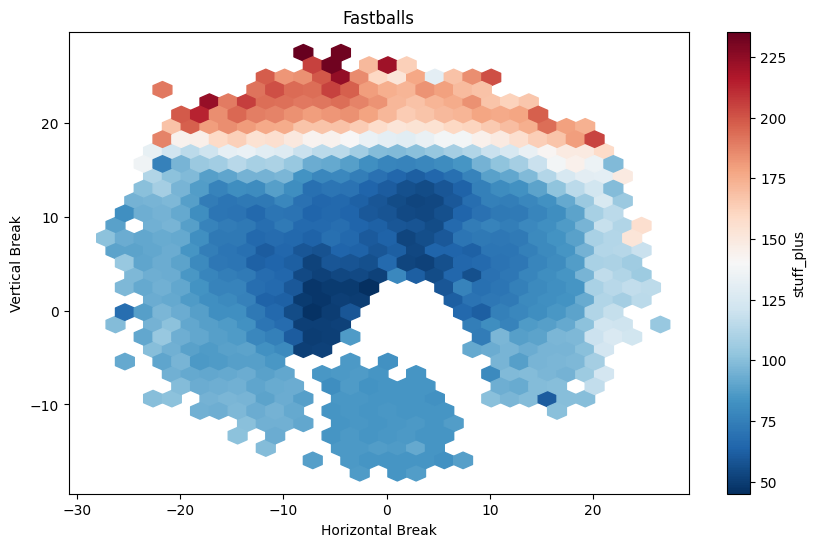

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(agg_fb['HB'], agg_fb['IVB'], C=agg_fb['stuff_plus'], gridsize=30,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Fastballs')

# Show the colorbar
plt.colorbar(label='stuff_plus')

# Show the plot
plt.show()

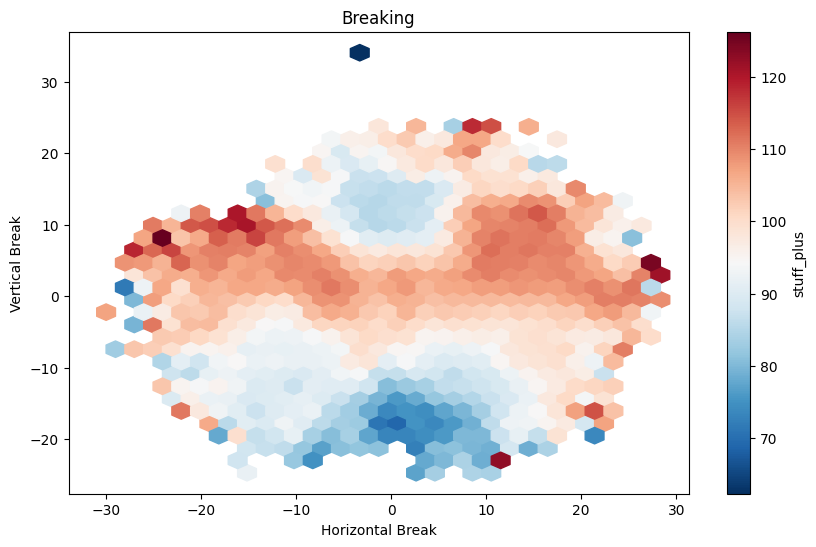

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(agg_bb['HB'], agg_bb['IVB'], C=agg_bb['stuff_plus'], gridsize=30,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Breaking')

# Show the colorbar
plt.colorbar(label='stuff_plus')

# Show the plot
plt.show()

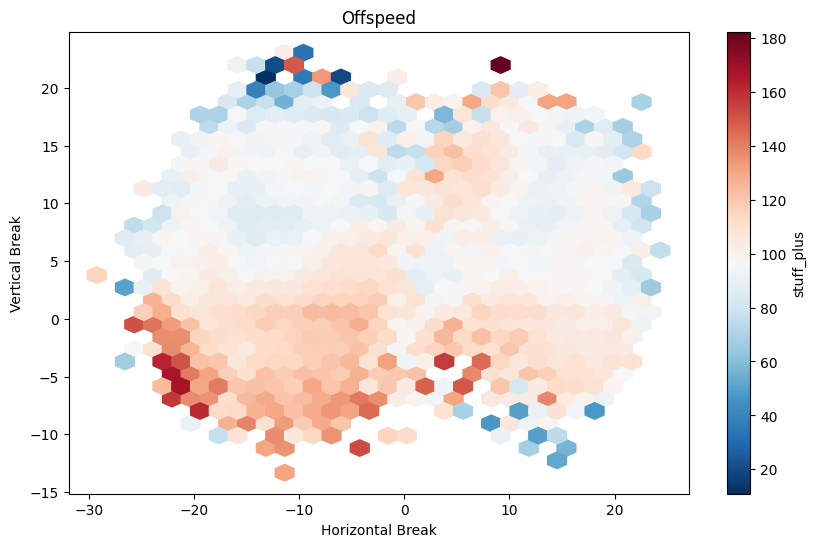

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(agg_offs['HB'], agg_offs['IVB'], C=agg_offs['stuff_plus'], gridsize=30,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Offspeed')

# Show the colorbar
plt.colorbar(label='stuff_plus')

# Show the plot
plt.show()

In [ ]:
# features = ['release_speed', 'release_spin', 'release_extension', 'IVB', 'HB', 'release_pos_x', 'release_pos_y', 'release_pos_z']
# features_with_dif = ['release_speed', 'release_spin', 'release_extension', 'IVB', 'HB', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'diff_velo', 'diff_IVB', 'diff_HB']

In [ ]:
import matplotlib.pyplot as plt

def plot_hexbin_by_speed(df, pitch_type, speed_list, x_axis='HB', y_axis='IVB', stuff_col='stuff_plus', gridsize=20):
    """
    Function to plot hexbin for given speeds and a specific pitch type.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the pitch data.
    - pitch_type (str): The pitch type to filter on (e.g., 'FF').
    - speed_list (list): A list of speeds to iterate over.
    - x_axis (str): Column name for x-axis (default 'HB').
    - y_axis (str): Column name for y-axis (default 'IVB').
    - stuff_col (str): Column name for color values (default 'stuff_plus').
    - gridsize (int): Grid size for the hexbin plot (default 20).
    - vmin (float): Minimum value for color scale (default 90).
    - vmax (float): Maximum value for color scale (default 130).
    """
    # Determine grid size based on the number of speeds
    n_speeds = len(speed_list)
    cols = 4  # You can change this depending on how you want to layout the plots
    rows = (n_speeds + cols - 1) // cols  # Calculate required number of rows

    vmin = df.loc[(df['pitch_type'] == pitch_type)][stuff_col].min()
    vmax = df.loc[(df['pitch_type'] == pitch_type)][stuff_col].max()

    fig, axs = plt.subplots(rows, cols, figsize=(20, 12))

    # Flatten axs in case there are multiple rows and columns
    if n_speeds > 1:
        axs = axs.ravel()
    else:
        axs = [axs]  # In case there's only one speed, axs is not iterable

    # Loop over each speed and plot
    for i, speed in enumerate(speed_list):
        # Filter data for the given pitch type and release speed
        x = df.loc[(df['pitch_type'] == pitch_type) & (df['release_speed'] == speed)][x_axis]
        y = df.loc[(df['pitch_type'] == pitch_type) & (df['release_speed'] == speed)][y_axis]
        stuff_plus_values = df.loc[(df['pitch_type'] == pitch_type) & (df['release_speed'] == speed)][stuff_col]

        # Create hexbin plot for the specific speed
        hb = axs[i].hexbin(x, y, gridsize=gridsize, C=stuff_plus_values, cmap='RdBu_r', vmin=vmin, vmax=vmax)

        # Set titles and labels for each plot
        axs[i].set_title(f'{pitch_type} at {speed} mph')
        axs[i].set_xlabel(x_axis)
        axs[i].set_ylabel(y_axis)

        # Add colorbar
        fig.colorbar(hb, ax=axs[i], label=stuff_col)

    # Adjust layout
    plt.tight_layout()
    plt.show()




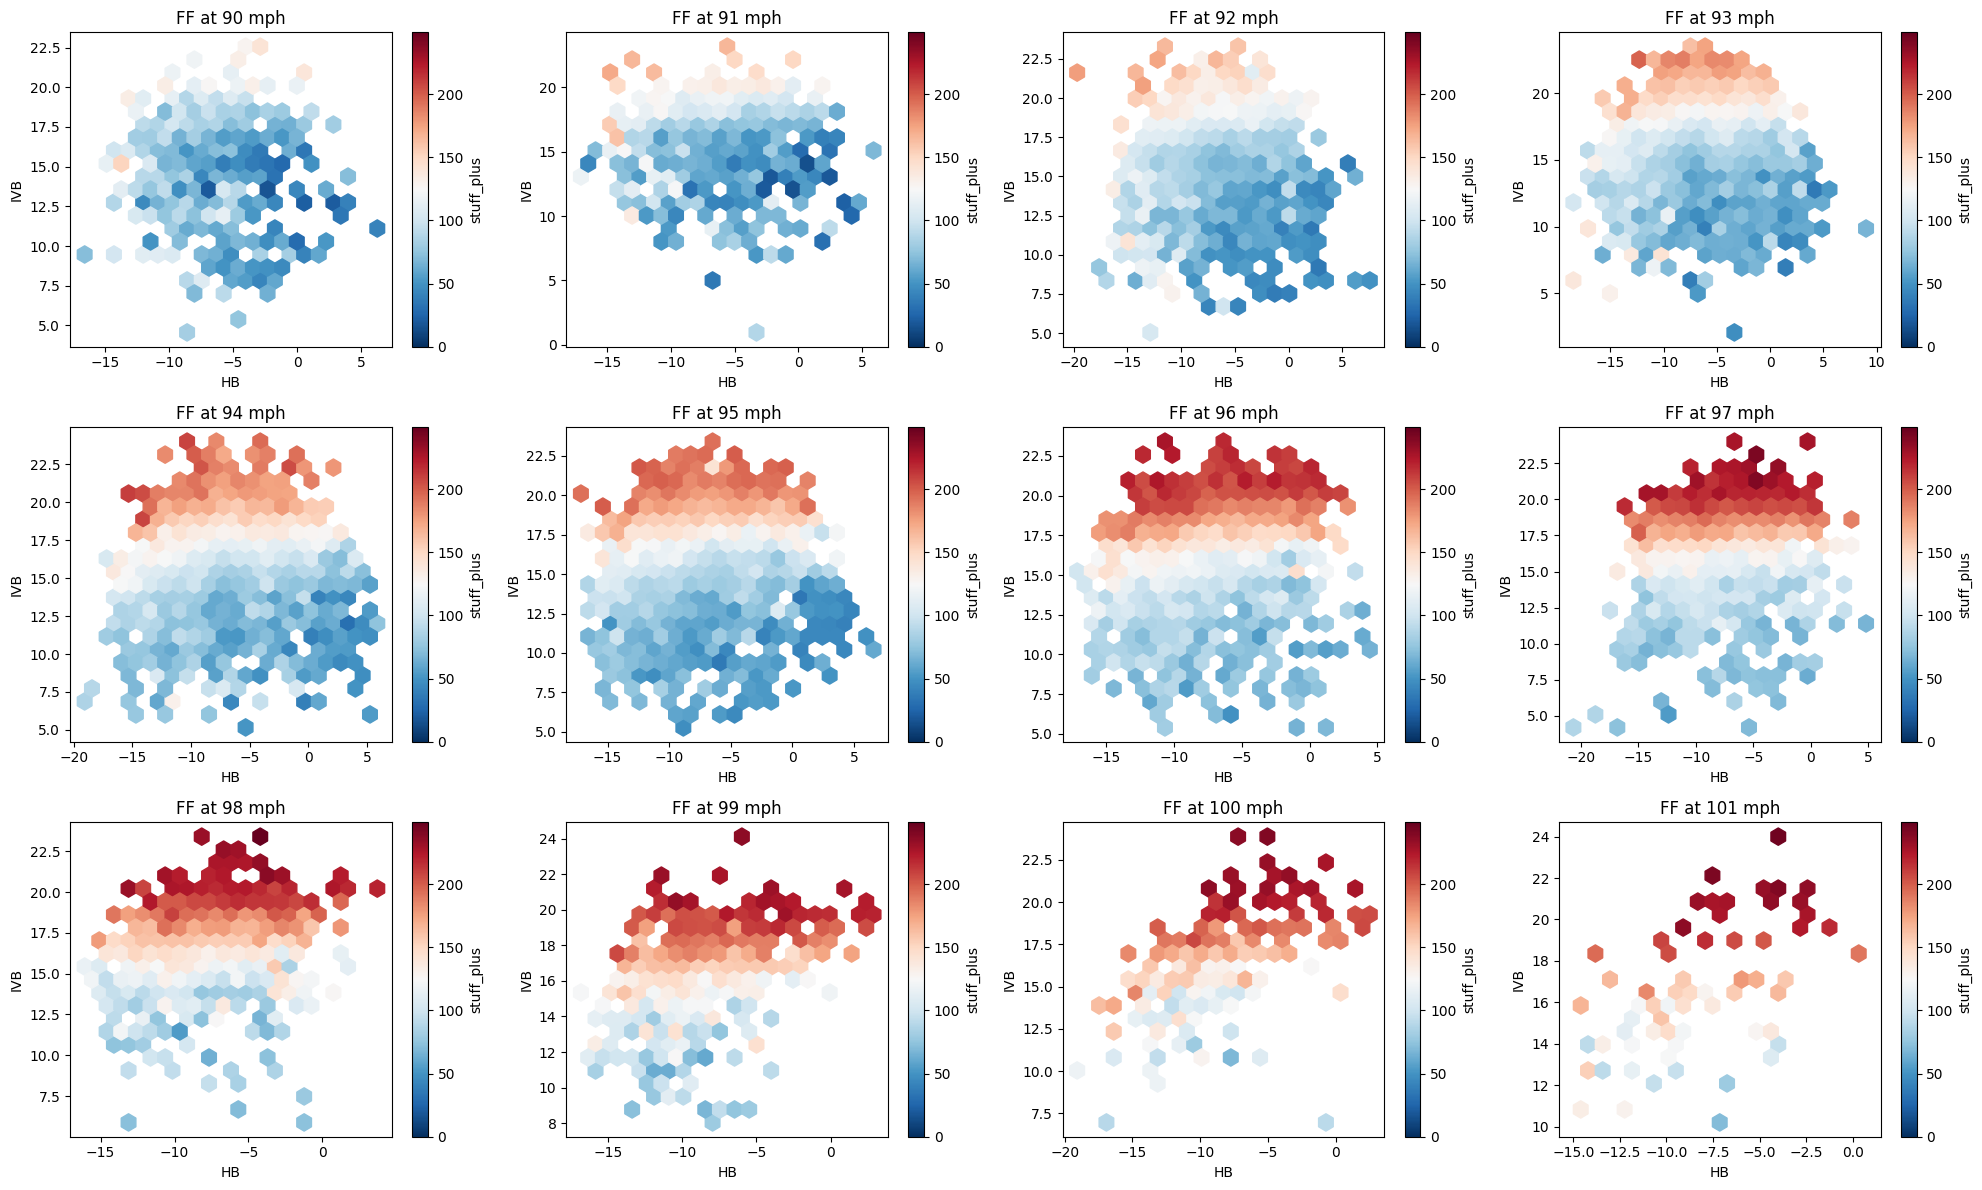

In [ ]:
# Example usage:
speed_list = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]

plot_hexbin_by_speed(agg_fb.loc[agg_fb['is_lhp'] == 0], pitch_type='FF', speed_list=speed_list)

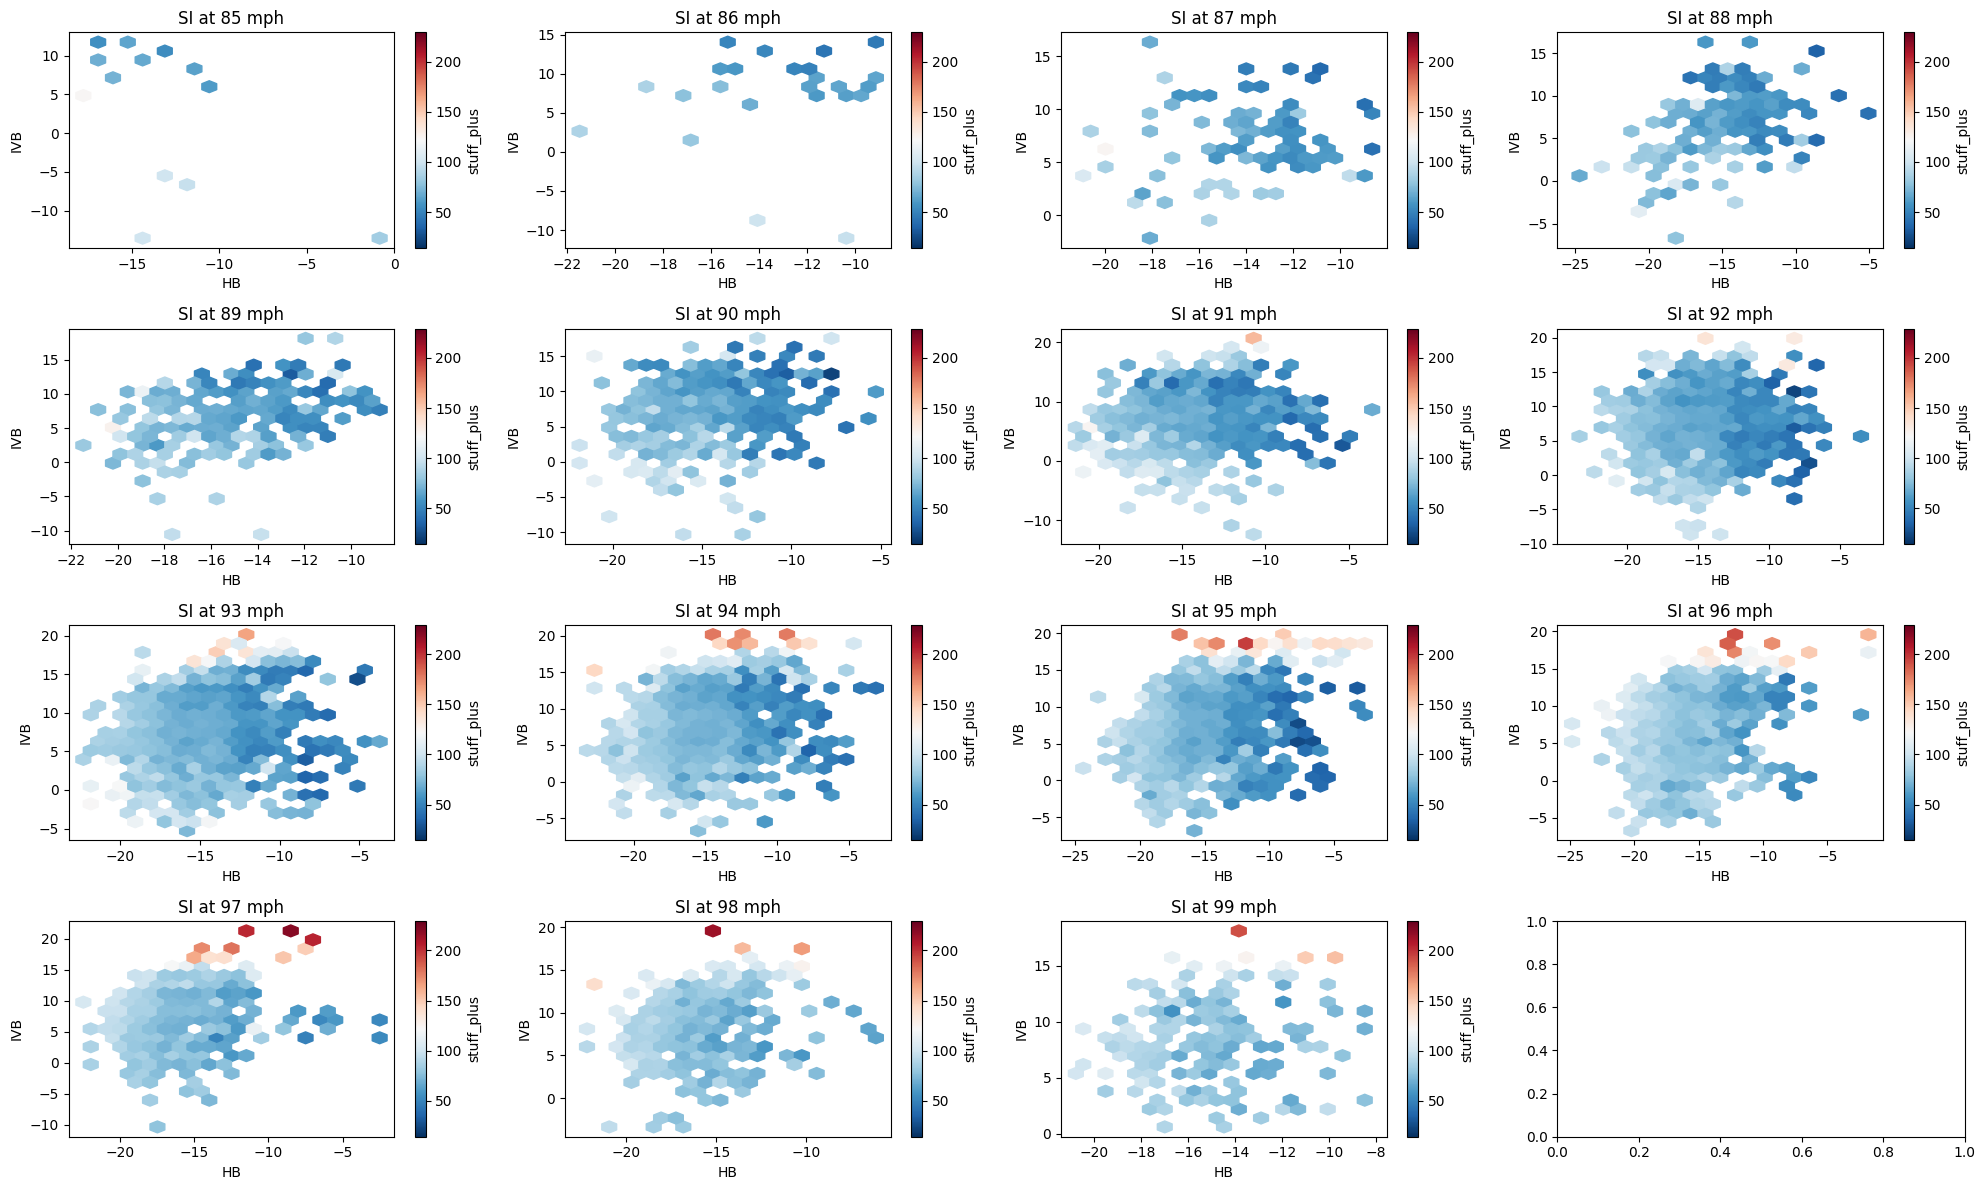

In [ ]:
# Example usage:
speed_list = [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

plot_hexbin_by_speed(agg_fb.loc[agg_fb['is_lhp'] == 0], pitch_type='SI', speed_list=speed_list)

# Case Scenario Testing (Fastball)

In [ ]:
pred_vel = 95.0 # speed
pred_IVB = 3.0 # induced vertical break
pred_HB = 15.0 # horizontal break
pred_re = 6.5 # release extension (ft)
pred_rs = 2300 # spin rate
pred_rpy = 53 # Distance from home plate (ft)
pred_rpz = 6.1 # Release height (ft)
pred_rpx = -2.5 # Release side (ft)

pred_df = pd.DataFrame({'release_speed': pred_vel, 'release_spin': pred_rs, 'release_extension':pred_re, 'IVB':pred_IVB, 'HB':pred_HB, 'release_pos_x':pred_rpx, 'release_pos_y':pred_rpy, 'release_pos_z':pred_rpz }, index=[0])

pred_features = [pred_vel, pred_rs, pred_re, pred_IVB, pred_HB, pred_rpx, pred_rpy, pred_rpz]

In [ ]:
pred_vel = 100.0 # speed
pred_IVB = 18.0 # induced vertical break
pred_HB = 8 # horizontal break
pred_re = 6.5 # release extension (ft)
pred_rs = 3000 # spin rate
pred_rpy = 53 # Distance from home plate (ft)
pred_rpz = 6.9 # Release height (ft)
pred_rpx = -3.5 # Release side (ft)

pred_df = pd.DataFrame({'release_speed': pred_vel, 'release_spin': pred_rs, 'release_extension':pred_re, 'IVB':pred_IVB, 'HB':pred_HB, 'release_pos_x':pred_rpx, 'release_pos_y':pred_rpy, 'release_pos_z':pred_rpz }, index=[0])

pred_features = [pred_vel, pred_rs, pred_re, pred_IVB, pred_HB, pred_rpx, pred_rpy, pred_rpz]

## Edwin Diaz pitch

### Scenario 1

In [ ]:
pred_vel = 97.5 # speed
pred_IVB = 12.7 # induced vertical break
pred_HB = 13 # horizontal break
pred_re = 7.42 # release extension (ft)
pred_rs = 2348 # spin rate
pred_rpy = 60 - pred_re # Distance from home plate (ft)
pred_rpz = 57.6/12 # Release height (ft)
pred_rpx = -25.3/12 # Release side (ft)

pred_df = pd.DataFrame({'release_speed': pred_vel, 'release_spin': pred_rs, 'release_extension':pred_re, 'IVB':pred_IVB, 'HB':pred_HB, 'release_pos_x':pred_rpx, 'release_pos_y':pred_rpy, 'release_pos_z':pred_rpz }, index=[0])

pred_features = [pred_vel, pred_rs, pred_re, pred_IVB, pred_HB, pred_rpx, pred_rpy, pred_rpz]

### Scenario 2

In [ ]:
pred_vel = 97.0 # speed
pred_IVB = 16.8 # induced vertical break
pred_HB = -5 # horizontal break
pred_re = 6.38 # release extension (ft)
pred_rs = 2566 # spin rate
pred_rpy = 60 - pred_re # Distance from home plate (ft)
pred_rpz = 63.3/12 # Release height (ft)
pred_rpx = 29.4/12 # Release side (ft)

pred_df = pd.DataFrame({'release_speed': pred_vel, 'release_spin': pred_rs, 'release_extension':pred_re, 'IVB':pred_IVB, 'HB':pred_HB, 'release_pos_x':pred_rpx, 'release_pos_y':pred_rpy, 'release_pos_z':pred_rpz }, index=[0])

pred_features = [pred_vel, pred_rs, pred_re, pred_IVB, pred_HB, pred_rpx, pred_rpy, pred_rpz]

In [ ]:
velo: 97.0
IVB: 16.8”
HB: -5.0”
Ext: 6.38’
Spin: 2566
Rel Height: 63.3”
Rel Side: 29.4”

In [ ]:
pred_df

release_speed  release_spin  release_extension   IVB   HB  release_pos_x  \
0           90.0          3000                6.5  16.0  2.0           -2.5   

   release_pos_y  release_pos_z  
0             53            6.1

In [ ]:
swing_probs_pred = swing_model.predict_proba(pred_df[features])
take_probs_pred = take_model.predict_proba(pred_df[features])
ws_probs_pred = will_swing_model.predict_proba(pred_df[features])
woba_probs_pred = woba_model.predict_proba(pred_df[features])


In [ ]:
pred_df['whiff_prob'] = swing_probs_pred[:, list(le_swing.inverse_transform(swing_model.classes_)).index('whiff')]
pred_df['in_play_prob'] = swing_probs_pred[:, list(le_swing.inverse_transform(swing_model.classes_)).index('in_play')]
pred_df['foul_prob'] = swing_probs_pred[:, list(le_swing.inverse_transform(swing_model.classes_)).index('foul')]

pred_df['strike_prob'] = take_probs_pred[:, list(le_take.inverse_transform(take_model.classes_)).index('strike')]
pred_df['ball_prob'] = take_probs_pred[:, list(le_take.inverse_transform(take_model.classes_)).index('ball')]
pred_df['hbp_prob'] = take_probs_pred[:, list(le_take.inverse_transform(take_model.classes_)).index('hbp')]

pred_df['single_prob'] = woba_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('single')]
pred_df['double_prob'] = woba_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('double')]
pred_df['triple_prob'] = woba_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('triple')]
pred_df['hr_prob'] = woba_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('home_run')]
pred_df['fo_prob'] = woba_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('field_out')]
pred_df['xwOBAcon'] = values['single'] * pred_df['single_prob'] + values['double'] * pred_df['double_prob'] + values['triple'] * pred_df['triple_prob'] + values['home_run'] * pred_df['hr_prob'] + values['field_out'] * pred_df['fo_prob']

In [ ]:
pred_df['swing_prob'] = ws_probs_pred[:, list(will_swing_model.classes_).index(1)]
pred_df['take_prob'] = 1 - pred_df['swing_prob']
pred_df['val_swing'] = values['swinging_strike'] * pred_df['whiff_prob'] + values['foul'] * pred_df['foul_prob'] + pred_df['xwOBAcon'] * pred_df['in_play_prob']
pred_df['val_take'] = values['called_strike'] * pred_df['strike_prob'] + values['ball'] * pred_df['ball_prob'] + values['hit_by_pitch'] * pred_df['hbp_prob']

pred_df['xRV'] = pred_df['val_swing'] * pred_df['swing_prob'] + pred_df['val_take'] * pred_df['take_prob']

In [ ]:
pred_df

release_speed  release_spin  release_extension   IVB  HB  release_pos_x  \
0          100.0          3000                6.5  20.0  10           -2.5   

   release_pos_y  release_pos_z  whiff_prob  in_play_prob  foul_prob  \
0             53            6.1    0.325157      0.205438   0.469405   

   strike_prob  ball_prob  hbp_prob  single_prob  double_prob  triple_prob  \
0     0.331176     0.6635  0.005324     0.181148     0.066974     0.006621   

    hr_prob   fo_prob  xwOBAcon  swing_prob  take_prob  val_swing  val_take  \
0  0.056589  0.688668  0.086049    0.500174   0.499826  -0.038592  0.021039   

        xRV  
0 -0.008787

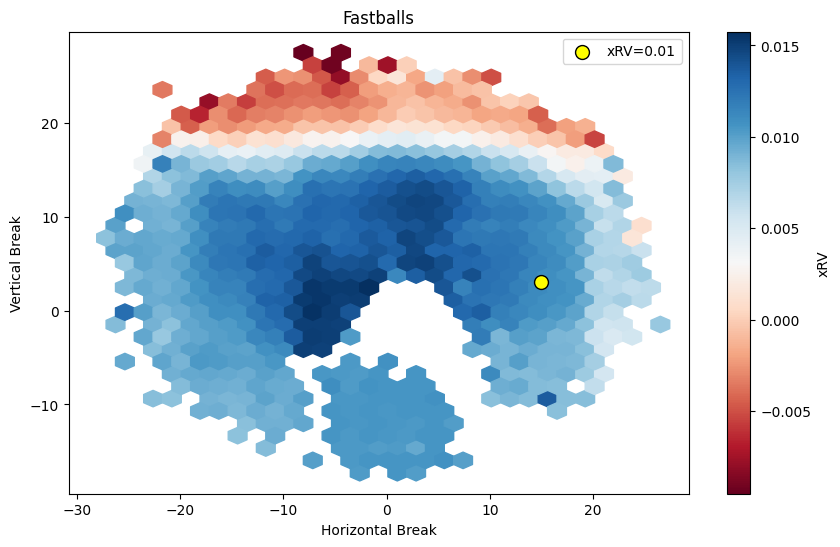

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(agg_fb['HB'], agg_fb['IVB'], C=agg_fb['xRV'], gridsize=30,cmap='RdBu')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Fastballs')

# Add colorbar
plt.colorbar(label='xRV')

# Extract the values from pred_df for the single data point
single_point_HB = pred_df['HB'].values[0]
single_point_IVB = pred_df['IVB'].values[0]
single_point_xRV = pred_df['xRV'].values[0]

# Plot the single data point using plt.scatter
plt.scatter(single_point_HB, single_point_IVB, color='yellow', edgecolor='black', s=100, label=f"xRV={single_point_xRV:.2f}")

# Show the legend for the single point
plt.legend()

# Show the plot
plt.show()

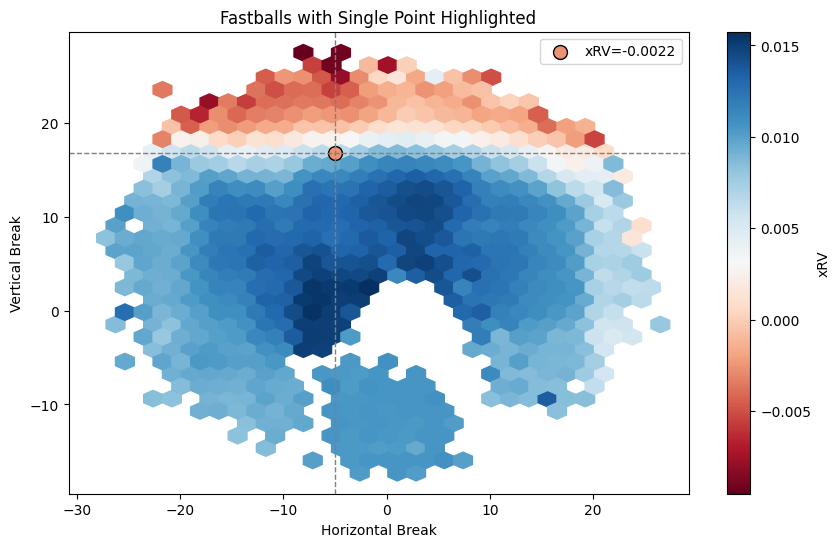

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define the colormap
cmap = plt.get_cmap('RdBu')

# Plot the hexbin for the entire dataset
plt.figure(figsize=(10, 6))
hexbin_plot = plt.hexbin(agg_fb['HB'], agg_fb['IVB'], C=agg_fb['xRV'], gridsize=30, cmap=cmap)

# Add colorbar to the hexbin
plt.colorbar(label='xRV')

# Extract the values from pred_df for the single data point
single_point_HB = pred_df['HB'].values[0]
single_point_IVB = pred_df['IVB'].values[0]
single_point_xRV = pred_df['xRV'].values[0]

# Calculate the color for the point based on its xRV using the colormap
norm = plt.Normalize(agg_fb['xRV'].min(), agg_fb['xRV'].max())  # Normalize xRV values to colormap
point_color = cmap(norm(single_point_xRV))

# Plot the single data point with color based on xRV
plt.scatter(single_point_HB, single_point_IVB, color=point_color, edgecolor='black', s=100, label=f"xRV={single_point_xRV:.4f}")

# Add vertical and horizontal lines crossing at the point's HB and IVB values
plt.axhline(y=single_point_IVB, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=single_point_HB, color='grey', linestyle='--', linewidth=1)

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Fastballs with Single Point Highlighted')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
features_with_dif

['release_speed',
 'release_spin',
 'release_extension',
 'IVB',
 'HB',
 'release_pos_x',
 'release_pos_y',
 'release_pos_z',
 'diff_velo',
 'diff_IVB',
 'diff_HB']

## Offspeed Scenario

In [ ]:
pred_vel = 84.0 # speed
pred_IVB = 9.0 # induced vertical break
pred_HB = 12 # horizontal break
pred_re = 6.3 # release extension (ft)
pred_rs = 1800 # spin rate
pred_rpy = 53 # Distance from home plate (ft)
pred_rpz = 6.7 # Release height (ft)
pred_rpx = -3.3 # Release side (ft)
pred_diff_velo = 10.0
pred_diff_IVB = 5.0
pred_diff_HB = 5.0


pred_df = pd.DataFrame({'release_speed': pred_vel, 'release_spin': pred_rs, 'release_extension':pred_re, 'IVB':pred_IVB, 'HB':pred_HB, 'release_pos_x':pred_rpx, 'release_pos_y':pred_rpy,
                        'release_pos_z':pred_rpz, 'diff_velo': pred_diff_velo, 'diff_IVB': pred_diff_IVB, 'diff_HB': pred_diff_HB}, index=[0])

pred_features = [pred_vel, pred_rs, pred_re, pred_IVB, pred_HB, pred_rpx, pred_rpy, pred_rpz, pred_diff_velo, pred_diff_IVB, pred_diff_HB]

In [ ]:
pred_df

release_speed  release_spin  release_extension   IVB   HB  release_pos_x  \
0           90.0          3000                6.5  16.0  2.0           -2.5   

   release_pos_y  release_pos_z  
0             53            6.1

In [ ]:
swing_offs_probs_pred = swing_model.predict_proba(pred_df[features])
take_offs_probs_pred = take_model.predict_proba(pred_df[features])
ws_offs_probs_pred = will_swing_model.predict_proba(pred_df[features])
woba_offs_probs_pred = woba_model.predict_proba(pred_df[features])


In [ ]:
pred_df['whiff_prob'] = swing_offs_probs_pred[:, list(le_swing.inverse_transform(swing_model.classes_)).index('whiff')]
pred_df['in_play_prob'] = swing_offs_probs_pred[:, list(le_swing.inverse_transform(swing_model.classes_)).index('in_play')]
pred_df['foul_prob'] = swing_offs_probs_pred[:, list(le_swing.inverse_transform(swing_model.classes_)).index('foul')]

pred_df['strike_prob'] = take_offs_probs_pred[:, list(le_take.inverse_transform(take_model.classes_)).index('strike')]
pred_df['ball_prob'] = take_offs_probs_pred[:, list(le_take.inverse_transform(take_model.classes_)).index('ball')]
pred_df['hbp_prob'] = take_offs_probs_pred[:, list(le_take.inverse_transform(take_model.classes_)).index('hbp')]

pred_df['single_prob'] = woba_offs_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('single')]
pred_df['double_prob'] = woba_offs_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('double')]
pred_df['triple_prob'] = woba_offs_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('triple')]
pred_df['hr_prob'] = woba_offs_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('home_run')]
pred_df['fo_prob'] = woba_offs_probs_pred[:, list(le_woba.inverse_transform(woba_model.classes_)).index('field_out')]
pred_df['xwOBAcon'] = values['single'] * pred_df['single_prob'] + values['double'] * pred_df['double_prob'] + values['triple'] * pred_df['triple_prob'] + values['home_run'] * pred_df['hr_prob'] + values['field_out'] * pred_df['fo_prob']

In [ ]:
pred_df['swing_prob'] = ws_offs_probs_pred[:, list(will_swing_model.classes_).index(1)]
pred_df['take_prob'] = 1 - pred_df['swing_prob']
pred_df['val_swing'] = values['swinging_strike'] * pred_df['whiff_prob'] + values['foul'] * pred_df['foul_prob'] + pred_df['xwOBAcon'] * pred_df['in_play_prob']
pred_df['val_take'] = values['called_strike'] * pred_df['strike_prob'] + values['ball'] * pred_df['ball_prob'] + values['hit_by_pitch'] * pred_df['hbp_prob']

pred_df['xRV'] = pred_df['val_swing'] * pred_df['swing_prob'] + pred_df['val_take'] * pred_df['take_prob']

In [ ]:
pred_df

release_speed  release_spin  release_extension  IVB  HB  release_pos_x  \
0           84.0          1800                6.3  9.0  12           -3.3   

   release_pos_y  release_pos_z  diff_velo  diff_IVB  diff_HB  whiff_prob  \
0             53            6.7       10.0       5.0      5.0    0.140419   

   in_play_prob  foul_prob  strike_prob  ball_prob  hbp_prob  single_prob  \
0       0.46234   0.397241     0.409037   0.584142   0.00682     0.229557   

   double_prob  triple_prob   hr_prob   fo_prob  xwOBAcon  swing_prob  \
0     0.064352     0.006362  0.038023  0.661706  0.086144    0.436961   

   take_prob  val_swing  val_take       xRV  
0   0.563039   0.008126  0.011012  0.009751

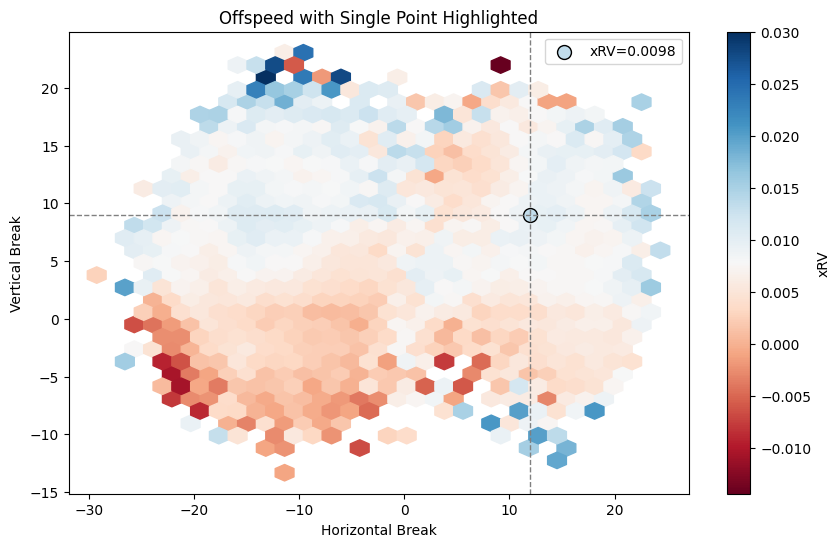

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define the colormap
cmap = plt.get_cmap('RdBu')

# Plot the hexbin for the entire dataset
plt.figure(figsize=(10, 6))
hexbin_plot = plt.hexbin(agg_offs['HB'], agg_offs['IVB'], C=agg_offs['xRV'], gridsize=30, cmap=cmap)

# Add colorbar to the hexbin
plt.colorbar(label='xRV')

# Extract the values from pred_df for the single data point
single_point_HB = pred_df['HB'].values[0]
single_point_IVB = pred_df['IVB'].values[0]
single_point_xRV = pred_df['xRV'].values[0]

# Calculate the color for the point based on its xRV using the colormap
norm = plt.Normalize(agg_offs['xRV'].min(), agg_offs['xRV'].max())  # Normalize xRV values to colormap
point_color = cmap(norm(single_point_xRV))

# Plot the single data point with color based on xRV
plt.scatter(single_point_HB, single_point_IVB, color=point_color, edgecolor='black', s=100, label=f"xRV={single_point_xRV:.4f}")

# Add vertical and horizontal lines crossing at the point's HB and IVB values
plt.axhline(y=single_point_IVB, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=single_point_HB, color='grey', linestyle='--', linewidth=1)

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Offspeed with Single Point Highlighted')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
pitch_types = ['FF', 'SI', 'FC', 'SL', 'CU', 'ST', 'CH', 'FS']

In [ ]:
from scipy.stats import spearmanr
from pybaseball import pitching_stats_bref

data = pitching_stats_bref(2022)

In [ ]:
data

Name  Age  #days            Lev                          Tm  \
1         Cory Abbott   26    728         Maj-NL                  Washington   
2        Albert Abreu   26    727         Maj-AL  Kansas City,New York,Texas   
3         Bryan Abreu   25    727         Maj-AL                     Houston   
4     Domingo Acevedo   28    728         Maj-AL                     Oakland   
5          Jason Adam   30    734         Maj-AL                   Tampa Bay   
..                ...  ...    ...            ...                         ...   
901    Aneurys Zabala   25    792         Maj-NL                       Miami   
902     Rob Zastryzny   30    727  Maj-AL,Maj-NL        Los Angeles,New York   
903       Angel Zerpa   22    798         Maj-AL                 Kansas City   
904        T.J. Zeuch   26    769         Maj-NL                  Cincinnati   
905  Bruce Zimmermann   27    757         Maj-AL                   Baltimore   

      G  GS    W    L   SV    IP   H   R  ER  BB  SO  HR  HBP    ERA   AB  2B  \
1    16   9  NaN  5.0  NaN  48.0  44  30  28  25  45  12    5   5.25  184  12   
2    33   0  2.0  2.0  NaN  38.2  35  15  14  22  38   5    3   3.26  144   5   
3    55   0  4.0  NaN  2.0  60.1  45  16  13  26  88   2    4   1.94  217   7   
4    70   0  4.0  4.0  4.0  67.2  50  26  25  17  58   9    3   3.33  243  11   
5    67   0  2.0  3.0  8.0  63.1  31  12  11  17  75   5    6   1.56  211   3   
..   ..  ..  ...  ...  ...   ...  ..  ..  ..  ..  ..  ..  ...    ...  ...  ..   
901   2   0  NaN  NaN  NaN   2.2   3   0   0   1   2   0    0   0.00    9   1   
902   6   0  NaN  NaN  NaN   4.0   3   4   3   1   3   0    0   6.75   15   1   
903   3   2  2.0  1.0  NaN  11.0   9   3   2   3   3   2    0   1.64   41   0   
904   3   3  NaN  3.0  NaN  10.2  24  18  18   7   5   5    3  15.19   53   1   
905  15  13  2.0  5.0  NaN  73.2  97  52  49  12  49  21    2   5.99  302  21   

     3B  IBB  GDP  SF  SB  CS  PO   BF   Pit   Str   StL   StS  GB/FB    LD  \
1     0    0    0   2   4   1   0  216   845  0.62  0.13  0.12   0.29  0.16   
2     0    0    5   2   1   2   2  172   707  0.59  0.18  0.10   0.53  0.26   
3     0    0    6   1   7   1   0  248  1020  0.62  0.13  0.18   0.48  0.23   
4     1    4    7   1   4   0   2  266  1005  0.67  0.12  0.16   0.42  0.22   
5     1    2    8   2  12   0   0  237   942  0.67  0.17  0.18   0.44  0.18   
..   ..  ...  ...  ..  ..  ..  ..  ...   ...   ...   ...   ...    ...   ...   
901   0    0    1   1   1   0   0   11    43  0.63  0.16  0.14   0.25  0.25   
902   1    0    0   0   1   0   0   16    72  0.65  0.11  0.11   0.42  0.25   
903   0    0    1   0   0   0   0   44   157  0.63  0.20  0.04   0.53  0.18   
904   0    0    2   1   2   0   0   64   250  0.59  0.16  0.07   0.49  0.22   
905   2    0   13   3   2   0   0  320  1130  0.67  0.16  0.09   0.40  0.26   

       PU   WHIP  BAbip   SO9  SO/W   mlbID  
1    0.11  1.438  0.248   8.4  1.80  676265  
2    0.03  1.474  0.291   8.8  1.73  656061  
3    0.12  1.177  0.336  13.1  3.38  650556  
4    0.09  0.990  0.232   7.7  3.41  642758  
5    0.13  0.758  0.196  10.7  4.41  592094  
..    ...    ...    ...   ...   ...     ...  
901  0.00  1.500  0.375   6.8  2.00  656008  
902  0.00  1.000  0.250   6.8  3.00  642239  
903  0.08  1.091  0.194   2.5  1.00  672582  
904  0.06  2.906  0.432   4.2  0.71  643615  
905  0.07  1.480  0.323   6.0  4.08  669145  

[871 rows x 41 columns]

In [ ]:
# agg_total
agg_fb

pitcher_name pitch_type  mean_xrv   mean_rv  num_pitches  \
1000        paul sewald         FF -0.016852 -0.007259          509   
874           matt bush         FF -0.016784  0.000053          435   
698          josh hader         SI -0.016311  0.007791          642   
1179       tanner scott         FF -0.016157  0.007654          467   
1156    spencer strider         FF -0.015855 -0.012860         1578   
...                 ...        ...       ...       ...          ...   
310       dakota hudson         FF -0.002722  0.004801          435   
103   antonio senzatela         FF -0.002641  0.016483          866   
1331       zack greinke         FF -0.001991 -0.010683          844   
915      michael pineda         FF -0.001128  0.011218          432   
800      kyle hendricks         FF -0.000294 -0.004676          382   

           velo    spin_rate        IVB         HB p_throws   xrv_100  \
1000  92.480550  2492.544204  13.668684 -11.896267        R -1.685246   
874   97.342069  2528.786207  19.025103  -6.757517        R -1.678429   
698   97.421340  2008.671340  17.616449   8.497383        L -1.631106   
1179  96.854176  2561.676660  16.578501   5.190835        L -1.615650   
1156  98.181812  2342.040558  17.684411  -5.203042        R -1.585479   
...         ...          ...        ...        ...      ...       ...   
310   91.329195  2167.505747   8.335448  -4.180138        R -0.272208   
103   94.232910  2131.942263  11.052471  -3.488868        R -0.264084   
1331  89.200118  2286.287915  15.808436  -2.028057        R -0.199144   
915   89.883102  1933.868056  14.065833  -5.496111        R -0.112841   
800   86.876702  2014.819372  15.649634  -5.993089        R -0.029449   

      xrv_100_adj  stuff_plus  
1000     1.701291  214.121729  
874      1.694474  213.263768  
698      1.647151  207.307790  
1179     1.631695  205.362536  
1156     1.601524  201.565196  
...           ...         ...  
310      0.288253   36.279110  
103      0.280129   35.256623  
1331     0.215189   27.083327  
915      0.128886   16.221369  
800      0.045494    5.725815  

[422 rows x 13 columns]

In [ ]:

data['K%'] = data['SO'] / data['BF']
uBB = data['BB'] - data['IBB']
HBP = data['HBP']
S = data['H'] - (data['HR'] + data['2B'] + data['3B'])
woba = (0.70 * uBB + 0.73 * HBP + 0.89 * S + 1.27 * data['2B'] + 1.61 * data['3B'] + 2.07 * data['HR']) / (data['AB']+data['BB']-data['IBB']+data['HBP']+data['SF'])
data['o-wOBA'] = woba
# agg_total[['Last Name', 'First Name']] = agg_total['pitcher_name'].str.split(', ', expand=True)
# agg_total['Full Name'] = agg_total['First Name'] + ' ' + agg_total['Last Name']
stats_stuff = data.merge(agg_total, left_on='mlbID', right_on='mlbID', how='inner')

sp_correlation_df = pd.DataFrame(index=['ERA', 'WHIP', 'SO9', 'RV', 'BAbip', 'K%', 'o-wOBA'])

for column in sp_correlation_df.index:
    corr, _ = spearmanr(stats_stuff['stuff_plus'], stats_stuff[column])
    sp_correlation_df.loc[column, 'Spearman Rank Correlation'] = corr
print('Stuff+ vs. Next Year Stats\nSpearman Rank Correlations')
sp_correlation_df

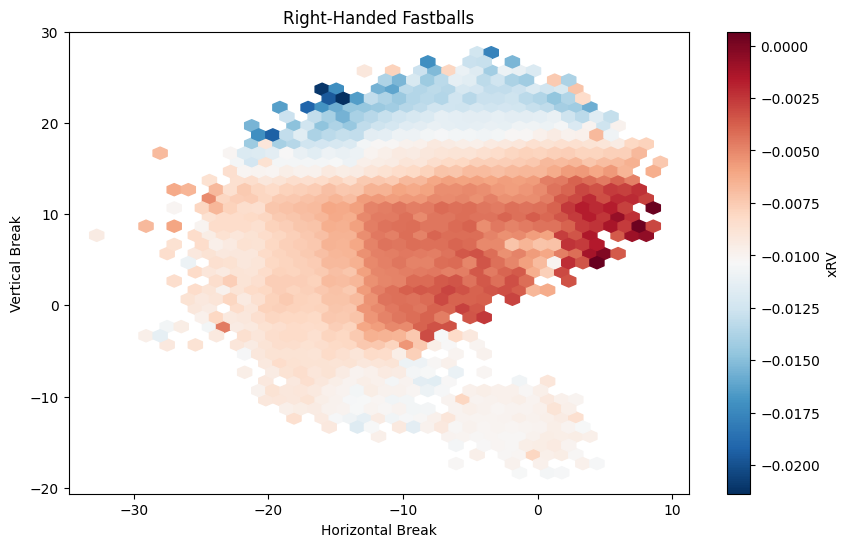

In [ ]:
import matplotlib.pyplot as plt

fastball_r_df = fastball_df[fastball_df['p_throws'] == 'R']

plt.figure(figsize=(10, 6))
plt.hexbin(fastball_r_df['HB'], fastball_r_df['IVB'], C=fastball_r_df['xRV'], gridsize=40,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Right-Handed Fastballs')

# Show the colorbar
plt.colorbar(label='xRV')

# Show the plot
plt.show()

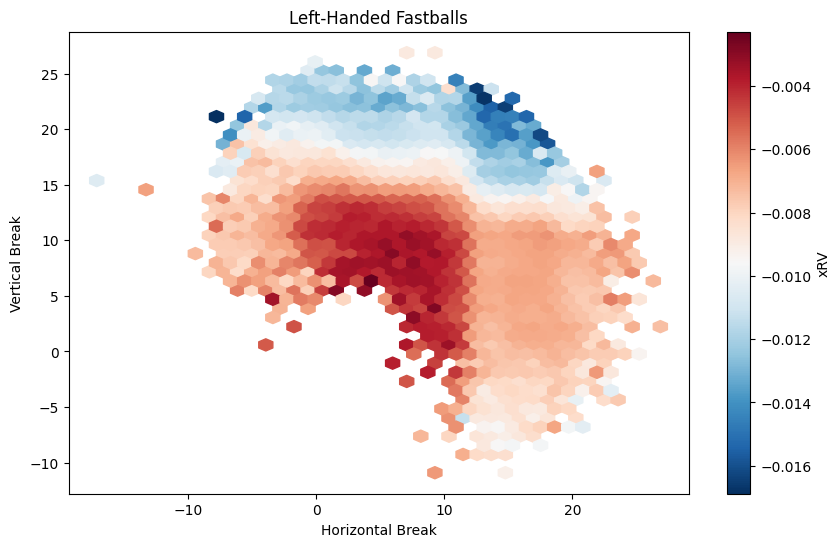

In [ ]:
import matplotlib.pyplot as plt

fastball_r_df = fastball_df[fastball_df['p_throws'] == 'L']

plt.figure(figsize=(10, 6))
plt.hexbin(fastball_r_df['HB'], fastball_r_df['IVB'], C=fastball_r_df['xRV'], gridsize=40,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Left-Handed Fastballs')

# Show the colorbar
plt.colorbar(label='xRV')

# Show the plot
plt.show()

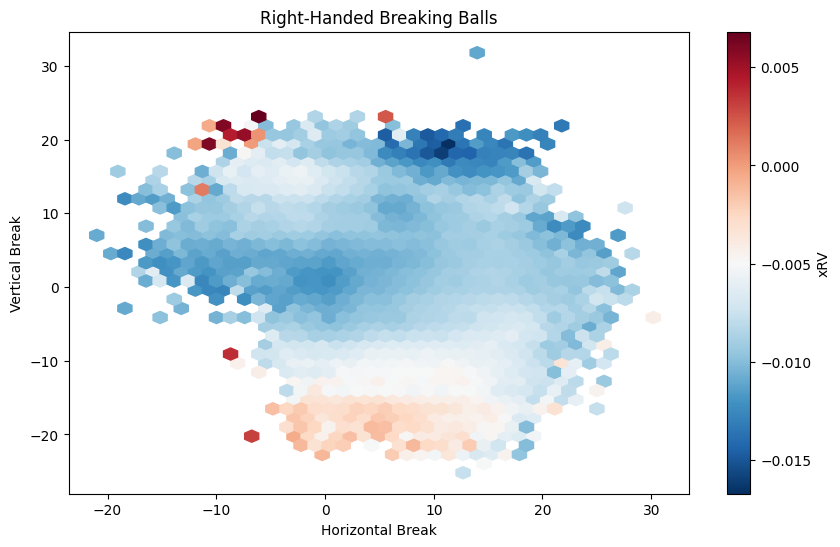

In [ ]:
bb_r_df = bb_df[bb_df['p_throws'] == 'R']

plt.figure(figsize=(10, 6))
plt.hexbin(bb_r_df['HB'], bb_r_df['IVB'], C=bb_r_df['xRV'], gridsize=40,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Right-Handed Breaking Balls')

# Show the colorbar
plt.colorbar(label='xRV')

# Show the plot
plt.show()

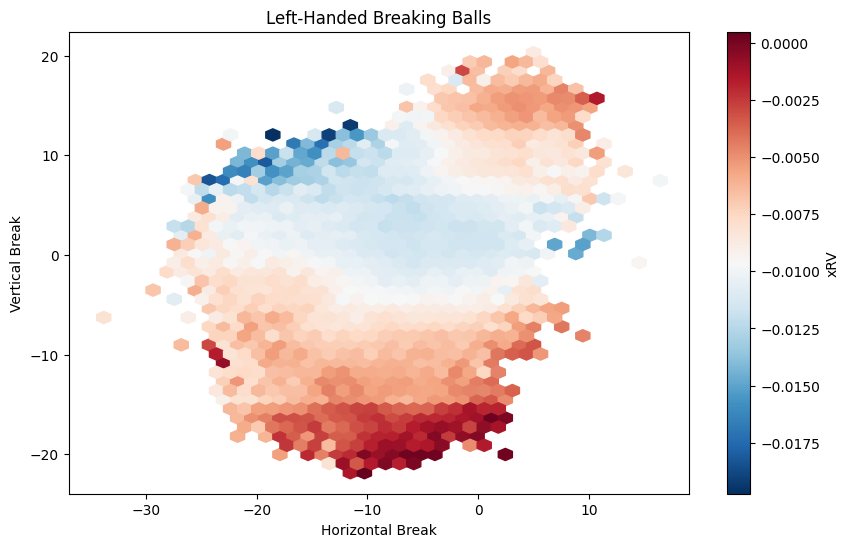

In [ ]:
bb_r_df = bb_df[bb_df['p_throws'] == 'L']

plt.figure(figsize=(10, 6))
plt.hexbin(bb_r_df['HB'], bb_r_df['IVB'], C=bb_r_df['xRV'], gridsize=40,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Left-Handed Breaking Balls')

# Show the colorbar
plt.colorbar(label='xRV')

# Show the plot
plt.show()

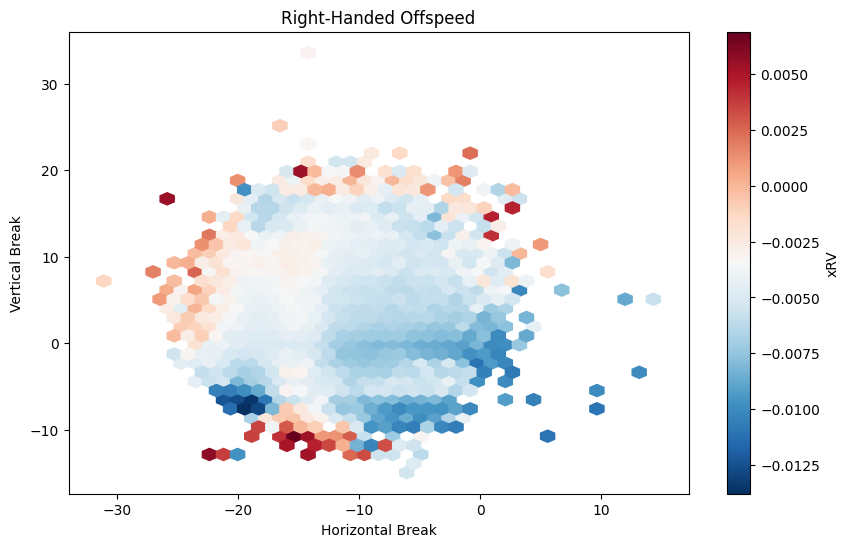

In [ ]:
offs_l_df = offs_df[offs_df['p_throws'] == 'R']

plt.figure(figsize=(10, 6))
plt.hexbin(offs_l_df['HB'], offs_l_df['IVB'], C=offs_l_df['xRV'], gridsize=40,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Right-Handed Offspeed')

# Show the colorbar
plt.colorbar(label='xRV')

# Show the plot
plt.show()

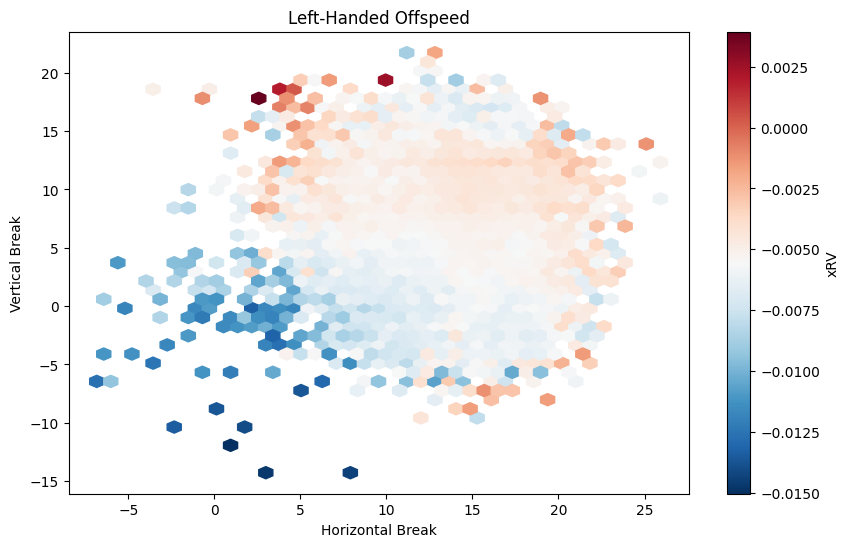

In [ ]:
offs_l_df = offs_df[offs_df['p_throws'] == 'L']

plt.figure(figsize=(10, 6))
plt.hexbin(offs_l_df['HB'], offs_l_df['IVB'], C=offs_l_df['xRV'], gridsize=40,cmap='RdBu_r')

# Set labels and title
plt.xlabel('Horizontal Break')
plt.ylabel('Vertical Break')
plt.title('Left-Handed Offspeed')

# Show the colorbar
plt.colorbar(label='xRV')

# Show the plot
plt.show()